In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scanpy as sc
import anndata as ad

import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

import scvi
from anndata import AnnData
import umap
import seaborn as sns
import matplotlib.pylot as plt
import numpy as np
import pandas as pd
import torch
!pip install scanpy
import scanpy as sc

In [ ]:
!pip install scvi-tools[notebooks]
from anndata import AnnData
import scvi
import umap

import umap


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.6/438.6 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 44.2 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19877 sha256=8f927f855a46ee447b3e993031e79ead3f0044a9dadf4cc92c92bfb98137d360
  Stored in directory: /root/.cache/pip/wheels/c3/64/48/03c38d8d906159eaa210b3c548fdb5

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/anndata/utils.py:429: FutureWarning: Importing CSRDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSRDataset instead.
  warn

# New Section

In [ ]:
# Read the file
with open('GSE81608_series_matrix.txt', 'r') as file:
    lines = file.readlines()

# Filter for lines starting with '!' for metadata
metadata_lines = [line.strip() for line in lines if line.startswith('!')]

# Look for specific metadata of interest
for line in metadata_lines:
    print(line)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Load the dataset (replace with your actual file path)
data = pd.read_csv('GSE81608_human_islets_rpkm.txt', sep='\t', index_col=0)

# Add a label column based on sample number
labels = [0 if i < 651 else 1 for i in range(len(data.columns))]  # 0 for control, 1 for T2D
data = data.T
data['label'] = labels  # Add label column
# Display the first few rows
print(data.head(50))

# Summary of the data
print(data.info())

# Basic statistics
#print(data.describe())

# Check for missing values summary
print("Missing values per column:\n", data.isnull().sum())

gene.id          1         2    3         9   10   11       12   13        14  \
Sample_1   47.3396    0.0000  0.0    0.0000  0.0  0.0   0.0000  0.0   31.2047   
Sample_2   24.0458    0.0000  0.0    0.0000  0.0  0.0  14.0425  0.0    0.0000   
Sample_3    2.2743    0.0000  0.0    0.0000  0.0  0.0   0.8412  0.0    7.8214   
Sample_4    0.0000    0.0000  0.0    0.0000  0.0  0.0   0.0000  0.0    0.0000   
Sample_5    0.0000    0.0000  0.0  130.9796  0.0  0.0   0.0000  0.0  120.6832   
Sample_6    0.0000    0.0000  0.0    0.0000  0.0  0.0   0.8614  0.0    2.8034   
Sample_7    0.0000    0.0000  0.0    0.0000  0.0  0.0   0.0000  0.0    0.7957   
Sample_8    0.0000    0.2540  0.0    0.0000  0.0  0.0  84.9357  0.0    0.6581   
Sample_9    0.0000    0.0000  0.0    0.0000  0.0  0.0   0.0000  0.0    0.0000   
Sample_10   2.0351    0.0000  0.0   79.5905  0.0  0.0   0.0000  0.0   32.5457   
Sample_11   1.7625    0.0000  0.0    0.0000  0.0  0.0   0.0000  0.0    0.0000   
Sample_12  14.5316    0.0000

In [ ]:
pip install 'scanpy[leiden]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.2 MB/s eta 0:00:00


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imputer.fit_transform(data.drop(columns=['label']))  # Drop 'label' for scaling

anndata = ad.AnnData(imputed_data)

sc.pp.normalize_total(adata=anndata, target_sum=1e4, exclude_highly_expressed=False)
new_data = anndata.X

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = data['label'].values  # Reattach labels for visualization

# Map numeric labels to string labels in a new column
pca_df['group'] = pca_df['label'].map({0: 'Control', 1: 'T2D'})

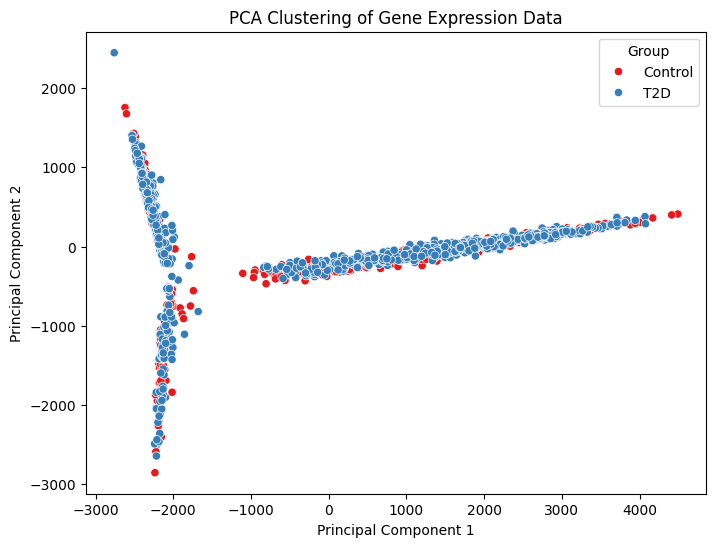

In [ ]:
# Visualize PCA results using the new 'group' column for hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='group', data=pca_df, palette='Set1')
plt.title('PCA Clustering of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Group')
plt.show()

In [ ]:
import re

metadata_file = "/content/GSE81608_series_matrix.txt"

ages = []
genders = []
cell_subtypes = []

with open(metadata_file, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()

        # We look only at lines that describe sample characteristics
        if line.startswith('!Sample_characteristics_ch1'):
            # Extract all values in quotes
            # Example line might look like:
            # !Sample_characteristics_ch1    "age: 23"  "age: 45" ...
            characteristics = re.findall(r'"([^"]+)"', line)

            # The first entry should tell us what kind of characteristic line this is
            # For example, if the first characteristic is "age: 23" then this is the age line.
            if characteristics:
                first_char = characteristics[0]

                # Split the first characteristic by ':'
                if ':' in first_char:
                    attr_name, _ = first_char.split(':', 1)
                    attr_name = attr_name.strip().lower()  # e.g. "age", "gender", "cell subtype"

                    # Extract just the values (e.g., from "age: 23" get "23")
                    values = []
                    for ch in characteristics:
                        # Each characteristic has the form "attr_name: value"
                        if ':' in ch:
                            _, val = ch.split(':', 1)
                            values.append(val.strip())

                    # Assign values to the appropriate list based on attr_name
                    if attr_name == 'age':
                        ages = values
                    elif attr_name == 'gender':
                        genders = values
                    elif attr_name == 'cell subtype':
                        cell_subtypes = values

# After this, you have three lists: ages, genders, and cell_subtypes
# Each list contains the values for all samples in the order they were found.
print("Ages:", ages)
print("Genders:", genders)
print("Cell Subtypes:", cell_subtypes)




Ages: ['23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '23', '23', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '68', '68', '68', '68', '68', '68', '68', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '60', '60', '60', '60', '60', '60', '60', '60', '60', '23', '23', '23', '23', '23', '23', '23', '23', '60', '60', '60', '60', '60', '60', '60', '60', '24', '24', '24', '24', '24', '24', '24', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56

In [ ]:
import pandas as pd

# Add the list as a column
data['Age'] = ages
data['Gender'] = genders
data['cell_subtype'] = cell_subtypes

print(data)


gene.id            1        2    3         9   10   11        12      13  \
Sample_1     47.3396   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_2     24.0458   0.0000  0.0    0.0000  0.0  0.0   14.0425  0.0000   
Sample_3      2.2743   0.0000  0.0    0.0000  0.0  0.0    0.8412  0.0000   
Sample_4      0.0000   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_5      0.0000   0.0000  0.0  130.9796  0.0  0.0    0.0000  0.0000   
...              ...      ...  ...       ...  ...  ...       ...     ...   
Sample_1596   0.0000   0.0000  0.0    0.0000  0.0  0.0  124.9825  0.2714   
Sample_1597   0.5372   0.0000  0.0    0.0000  0.0  0.0    3.5763  0.0000   
Sample_1598  31.1225   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_1599   0.0000  47.4664  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_1600   0.5788   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   

gene.id            14   15  ...  101929770  101929771  101930100  102723951  \
Sample_1

In [ ]:
import scanpy as sc
import anndata as ad

metadata_cols = ['label', 'Age', 'Gender', 'cell_subtype']
gene_cols = [c for c in data.columns if c not in metadata_cols]

X = data[gene_cols].values
obs = data[metadata_cols].copy()

# ... previous code ...
adata = ad.AnnData(X=X, obs=obs)
adata.var_names = [str(i) for i in gene_cols] # Convert gene_cols to string
adata.obs_names = data.index.astype(str)
# ... rest of the code ...

print("AnnData created:")
print(adata)

AnnData created:
AnnData object with n_obs × n_vars = 1600 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'


In [ ]:
empty_cells = (adata.X == 0).all(axis=1)
print(f"Number of empty cells: {np.sum(empty_cells)}")
adata = adata[~empty_cells, :]

# Filter genes: keep genes expressed in at least 10 cells
sc.pp.filter_genes(adata, min_cells=10)

# Convert adata.X to float32
adata.X = adata.X.astype(np.float32)

# Normalize total counts per cell
sc.pp.normalize_total(adata, target_sum=1e4, exclude_highly_expressed=False)

Number of empty cells: 0


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:284: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [ ]:
pip install scvi-tools[notebooks]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.6/438.6 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 50.0 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19877 sha256=3106291b164e53d94943aea470958c35a079b8b48a08c91a709214861bad4555
  Stored in directory: /root/.cache/pip/wheels/c3/64/48/03c38d8d906159eaa210b3c548fdb5

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improv

Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Latent representation shape: (1600, 10)


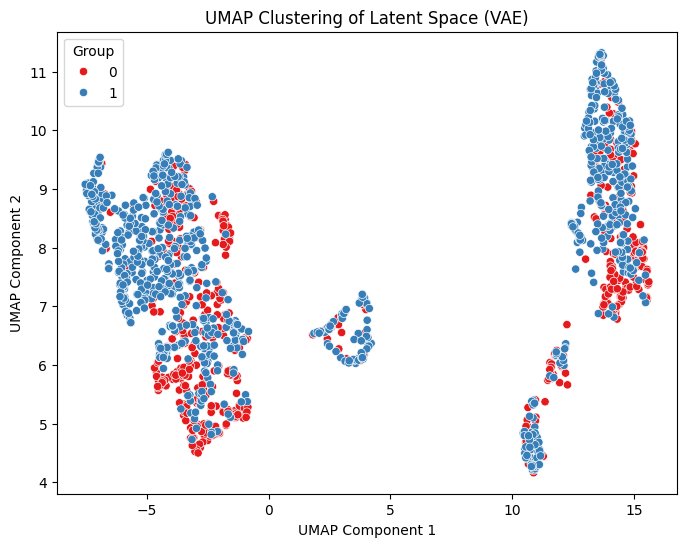

In [ ]:


scvi.model.SCVI.setup_anndata(adata, labels_key="label")

# -------------------------------
# Step 7: Train SCVI Model (VAE)
# -------------------------------
vae = scvi.model.SCVI(adata)
vae.train(max_epochs=100, train_size=0.9)

# -------------------------------
# Step 8: Extract Latent Representation & UMAP
# -------------------------------
latent = vae.get_latent_representation()
print(f"Latent representation shape: {latent.shape}")


# UMAP on latent space
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(latent)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
umap_df['group'] = adata.obs['label'].values

# -------------------------------
# Step 9: Plot UMAP
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
plt.title('UMAP Clustering of Latent Space (VAE)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Group')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(latent, adata.obs['label'])
print(f"Silhouette Score: {silhouette_avg}")

# Get reconstructed data as NumPy array
reconstructed_data = vae.get_normalized_expression().to_numpy()
original_data = adata.X

# Flatten arrays to match shapes for MSE computation
reconstructed_data_flat = reconstructed_data.flatten()
original_data_flat = original_data.flatten()

# Compute Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(original_data_flat, reconstructed_data_flat)
print(f"Reconstruction MSE: {mse}")

from sklearn.metrics import adjusted_rand_score

# Compute ARI
ari = adjusted_rand_score(adata.obs['label'], latent.argmax(axis=1))
print(f"Adjusted Rand Index: {ari}")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(latent, adata.obs['label'], test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression ROC-AUC: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Silhouette Score: 0.007431588135659695
Reconstruction MSE: 683.7420043945312
Adjusted Rand Index: 0.024034518498189147


In [ ]:
# Create separate AnnData objects for each cell subtype
subtypes = adata.obs['cell_subtype'].unique()

subtype_adata = {}
for subtype in subtypes:
    subtype_adata[subtype] = adata[adata.obs['cell_subtype'] == subtype].copy()

# Print headers of each subtype for verification
for subtype, sub_adata in subtype_adata.items():
    print(f"\nSubtype: {subtype}")
    print(sub_adata)



Subtype: beta
AnnData object with n_obs × n_vars = 503 × 25040
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: alpha
AnnData object with n_obs × n_vars = 946 × 25040
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: delta
AnnData object with n_obs × n_vars = 58 × 25040
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: PP
AnnData object with n_obs × n_vars = 93 × 25040
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'


In [ ]:
# Train a VAE for each cell subtype
vae_models = {}
performance_results = {}

for subtype, sub_adata in subtype_adata.items():
    print(f"\nTraining VAE for Subtype: {subtype}")

    # Setup and train the VAE
    scvi.model.SCVI.setup_anndata(sub_adata, labels_key="label")
    vae = scvi.model.SCVI(sub_adata)
    vae.train(max_epochs=100, train_size=0.9)

    # Save the trained model for this subtype
    vae_models[subtype] = vae

    # -------------------
    # Performance Metrics
    # -------------------
    # Latent Representation
    latent = vae.get_latent_representation()

    # Silhouette Score
    silhouette_avg = silhouette_score(latent, sub_adata.obs['label'])

    # Reconstruction MSE
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = sub_adata.X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())

    # Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(sub_adata.obs['label'], latent.argmax(axis=1))

    # Logistic Regression Metrics
    X_train, X_test, y_train, y_test = train_test_split(latent, sub_adata.obs['label'], test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Save performance metrics
    performance_results[subtype] = {
        "Silhouette Score": silhouette_avg,
        "Reconstruction MSE": mse,
        "Adjusted Rand Index": ari,
        "Logistic Regression Accuracy": accuracy,
        "Logistic Regression ROC-AUC": roc_auc
    }

    # Print the metrics
    print(f"Performance Metrics for Subtype: {subtype}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Reconstruction MSE: {mse}")
    print(f"Adjusted Rand Index: {ari}")
    print(f"Logistic Regression Accuracy: {accuracy}")
    print(f"Logistic Regression ROC-AUC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Training VAE for Subtype: beta


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (4) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Performance Metrics for Subtype: beta
Silhouette Score: 0.0353948213160038
Reconstruction MSE: 106.15030670166016
Adjusted Rand Index: 0.01961648636203693
Logistic Regression Accuracy: 0.7623762376237624
Logistic Regression ROC-AUC: 0.8127522195318806

Training VAE for Subtype: alpha


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Performance Metrics for Subtype: alpha
Silhouette Score: 0.04441928490996361
Reconstruction MSE: 607.9360961914062
Adjusted Rand Index: 0.015841826275013942
Logistic Regression Accuracy: 0.7684210526315789
Logistic Regression ROC-AUC: 0.8143056849953401

Training VAE for Subtype: delta


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Performance Metrics for Subtype: delta
Silhouette Score: 0.04561788588762283
Reconstruction MSE: 295.8292236328125
Adjusted Rand Index: 0.03561354176384095
Logistic Regression Accuracy: 0.75
Logistic Regression ROC-AUC: 0.7777777777777779

Training VAE for Subtype: PP


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Performance Metrics for Subtype: PP
Silhouette Score: 0.007423387840390205
Reconstruction MSE: 221.097412109375
Adjusted Rand Index: -0.013758090898015154
Logistic Regression Accuracy: 0.631578947368421
Logistic Regression ROC-AUC: 0.5777777777777778


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for subtype, vae in vae_models.items():
    print(f"\nPlotting UMAP for Subtype: {subtype}")

    # Get latent representation and apply UMAP
    latent = vae.get_latent_representation()
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)

    # Create a DataFrame for UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['group'] = subtype_adata[subtype].obs['label'].values

    # Plot the UMAP clustering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
    plt.title(f'UMAP Clustering of Latent Space (VAE) - Subtype: {subtype}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Group')
    plt.show()

# New Section

In [ ]:
import pandas as pd
import random

# Load the dataset (replace with your actual file path)
data = pd.read_csv('GSE81608_human_islets_rpkm.txt', sep='\t', index_col=0)

# Add a label column based on sample number
labels = [0 if i < 651 else 1 for i in range(len(data.columns))]  # 0 for control, 1 for T2D
data = data.T
data['label'] = labels  # Add label column



# Save the balanced dataset (optional)
#data.to_csv('balanced_dataset_simple.csv', index=False)
print(data.head())

gene.id         1    2    3         9   10   11       12   13        14   15  \
Sample_1  47.3396  0.0  0.0    0.0000  0.0  0.0   0.0000  0.0   31.2047  0.0   
Sample_2  24.0458  0.0  0.0    0.0000  0.0  0.0  14.0425  0.0    0.0000  0.0   
Sample_3   2.2743  0.0  0.0    0.0000  0.0  0.0   0.8412  0.0    7.8214  0.0   
Sample_4   0.0000  0.0  0.0    0.0000  0.0  0.0   0.0000  0.0    0.0000  0.0   
Sample_5   0.0000  0.0  0.0  130.9796  0.0  0.0   0.0000  0.0  120.6832  0.0   

gene.id   ...  101929767  101929768  101929769  101929770  101929771  \
Sample_1  ...     5.1983        0.0        0.0        0.0        0.0   
Sample_2  ...     0.1064        0.0        0.0        0.0        0.0   
Sample_3  ...     0.3188        0.0        0.0        0.0        0.0   
Sample_4  ...     0.0000        0.0        0.0        0.0        0.0   
Sample_5  ...     0.0000        0.0        0.0        0.0        0.0   

gene.id   101930100  102723951  102724004  102724238  label  
Sample_1       0.00     

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imputer.fit_transform(data.drop(columns=['label']))  # Drop 'label' for scaling

anndata = ad.AnnData(imputed_data)

#sc.pp.normalize_total(adata=anndata, target_sum=1e4, exclude_highly_expressed=False)
new_data = anndata.X




In [ ]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = data['label'].values  # Reattach labels for visualization

# Map numeric labels to string labels in a new column
pca_df['group'] = pca_df['label'].map({0: 'Control', 1: 'T2D'})

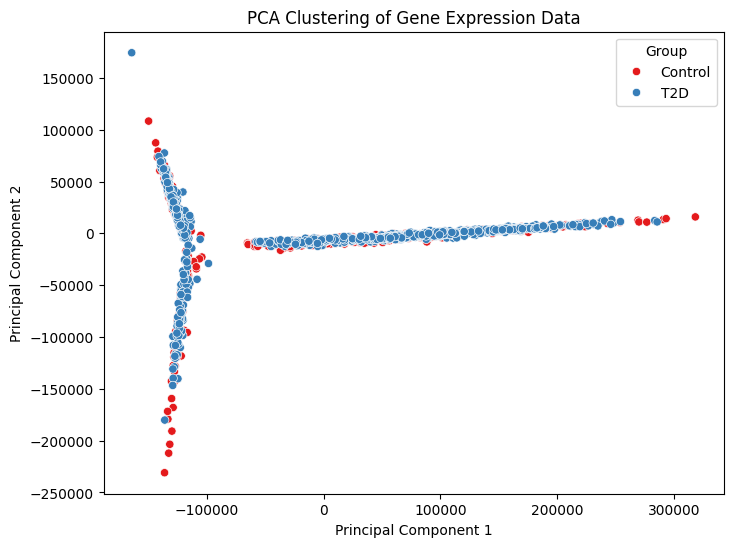

In [ ]:
# Visualize PCA results using the new 'group' column for hue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='group', data=pca_df, palette='Set1')
plt.title('PCA Clustering of Gene Expression Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Group')
plt.show()

In [ ]:
import re

metadata_file = "/content/GSE81608_series_matrix.txt"

ages = []
genders = []
cell_subtypes = []


# Open the file with UTF-8 encoding
with open(metadata_file, 'r', encoding='utf-8') as f:

        for line in f:

            line = line.strip()

            # We look only at lines that describe sample characteristics
            if line.startswith('!Sample_characteristics_ch1'):

                # Extract all values in quotes
                characteristics = re.findall(r'"([^"]+)"', line)

                if characteristics:
                    first_char = characteristics[0]

                    # Split the first characteristic by ':'
                    if ':' in first_char:
                        attr_name, _ = first_char.split(':', 1)
                        attr_name = attr_name.strip().lower()  # e.g., "age", "gender", "cell subtype"

                        # Extract just the values (e.g., from "age: 23" get "23")
                        values = []
                        for ch in characteristics:
                            if ':' in ch:
                                _, val = ch.split(':', 1)
                                values.append(val.strip())

                        # Assign values to the appropriate list based on attr_name
                        if attr_name == 'age':
                            ages = values
                        elif attr_name == 'gender':
                            genders = values
                        elif attr_name == 'cell subtype':
                            cell_subtypes = values

# After this, you have three lists: ages, genders, and cell_subtypes
# Each list contains the values for all samples in the order they were found.
print("Ages:", ages)
print("Genders:", genders)
print("Cell Subtypes:", cell_subtypes)


Ages: ['23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '23', '23', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '68', '68', '68', '68', '68', '68', '68', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '60', '60', '60', '60', '60', '60', '60', '60', '60', '23', '23', '23', '23', '23', '23', '23', '23', '60', '60', '60', '60', '60', '60', '60', '60', '24', '24', '24', '24', '24', '24', '24', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56

In [ ]:
import pandas as pd

# Add the list as a column
data['Age'] = ages
data['Gender'] = genders
data['cell_subtype'] = cell_subtypes

print(data)

gene.id            1        2    3         9   10   11        12      13  \
Sample_1     47.3396   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_2     24.0458   0.0000  0.0    0.0000  0.0  0.0   14.0425  0.0000   
Sample_3      2.2743   0.0000  0.0    0.0000  0.0  0.0    0.8412  0.0000   
Sample_4      0.0000   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_5      0.0000   0.0000  0.0  130.9796  0.0  0.0    0.0000  0.0000   
...              ...      ...  ...       ...  ...  ...       ...     ...   
Sample_1596   0.0000   0.0000  0.0    0.0000  0.0  0.0  124.9825  0.2714   
Sample_1597   0.5372   0.0000  0.0    0.0000  0.0  0.0    3.5763  0.0000   
Sample_1598  31.1225   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_1599   0.0000  47.4664  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_1600   0.5788   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   

gene.id            14   15  ...  101929770  101929771  101930100  102723951  \
Sample_1

In [ ]:
# Count number of labels
count_0 = (data['label'] == 0).sum()
count_1 = (data['label'] == 1).sum()

# Calculate the difference in number
diff = abs(count_0 - count_1)
count_del = 0

# While loop to delete random rows with label == 1
while count_del < diff:
    # Randomly choose an index
    random_index = random.choice(data.index)

    # Check label and delete if label == 1
    if data.loc[random_index, 'label'] == 1:
        data = data.drop(index=random_index)
        count_del += 1

# Check the new class distribution
print("Balanced class distribution:")
print(data['label'].value_counts())

Balanced class distribution:
label
0    651
1    651
Name: count, dtype: int64


In [ ]:
metadata_cols = ['label', 'Age', 'Gender', 'cell_subtype']
gene_cols = [c for c in data.columns if c not in metadata_cols]

X = data[gene_cols].values
obs = data[metadata_cols].copy()

# ... previous code ...
adata = ad.AnnData(X=X, obs=obs)
adata.var_names = [str(i) for i in gene_cols] # Convert gene_cols to string
adata.obs_names = data.index.astype(str)
# ... rest of the code ...

print("AnnData created:")
print(adata)
print(f"Original dataset: {adata.shape}")

AnnData created:
AnnData object with n_obs × n_vars = 1302 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
Original dataset: (1302, 39851)


In [ ]:
empty_cells = (adata.X == 0).all(axis=1)
print(f"Number of empty cells: {np.sum(empty_cells)}")
#adata = adata[~empty_cells, :]

# Filter genes: keep genes expressed in at least 10 cells
sc.pp.filter_genes(adata, min_cells=15)

# Convert adata.X to float32
adata.X = adata.X.astype(np.float32)

# Normalize total counts per cell
#sc.pp.normalize_total(adata, target_sum=1e4, exclude_highly_expressed=False)

print(f"Original dataset: {adata.shape}")

Number of empty cells: 0
Original dataset: (1302, 22647)


/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the

Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Latent representation shape: (1302, 10)


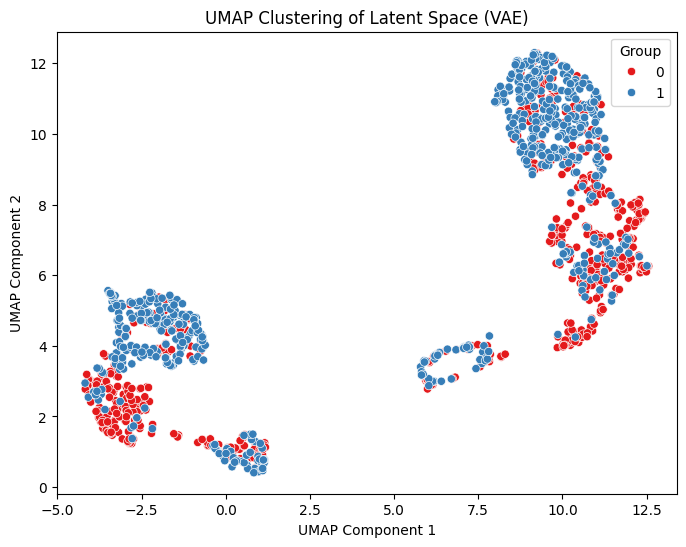

In [ ]:


scvi.model.SCVI.setup_anndata(adata, labels_key="label")
scvi.settings.seed = 42
# -------------------------------
# Step 7: Train SCVI Model (VAE)
# -------------------------------
vae = scvi.model.SCVI(adata)
vae.train(max_epochs=100, train_size=0.9)

# -------------------------------
# Step 8: Extract Latent Representation & UMAP
# -------------------------------
latent = vae.get_latent_representation()
print(f"Latent representation shape: {latent.shape}")


# UMAP on latent space
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(latent)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
umap_df['group'] = adata.obs['label'].values

# -------------------------------
# Step 9: Plot UMAP
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
plt.title('UMAP Clustering of Latent Space (VAE)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Group')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(latent, adata.obs['label'])
print(f"Silhouette Score: {silhouette_avg}")

# Get reconstructed data as NumPy array
reconstructed_data = vae.get_normalized_expression().to_numpy()
original_data = adata.X

# Flatten arrays to match shapes for MSE computation
reconstructed_data_flat = reconstructed_data.flatten()
original_data_flat = original_data.flatten()

# Compute Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(original_data_flat, reconstructed_data_flat)
print(f"Reconstruction MSE: {mse}")

from sklearn.metrics import adjusted_rand_score

# Compute ARI
ari = adjusted_rand_score(adata.obs['label'], latent.argmax(axis=1))
print(f"Adjusted Rand Index: {ari}")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(latent, adata.obs['label'], test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression ROC-AUC: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Silhouette Score: 0.01726645790040493
Reconstruction MSE: 2997.05615234375
Adjusted Rand Index: 0.026946182454364375
Logistic Regression Accuracy: 0.7662835249042146
Logistic Regression ROC-AUC: 0.8165531015037594
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77       133
           1       0.77      0.74      0.76       128

    accuracy                           0.77       261
   macro avg       0.77      0.77      0.77       261
weighted avg       0.77      0.77      0.77       261



/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improv

Training:   0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Latent representation shape: (1302, 20)


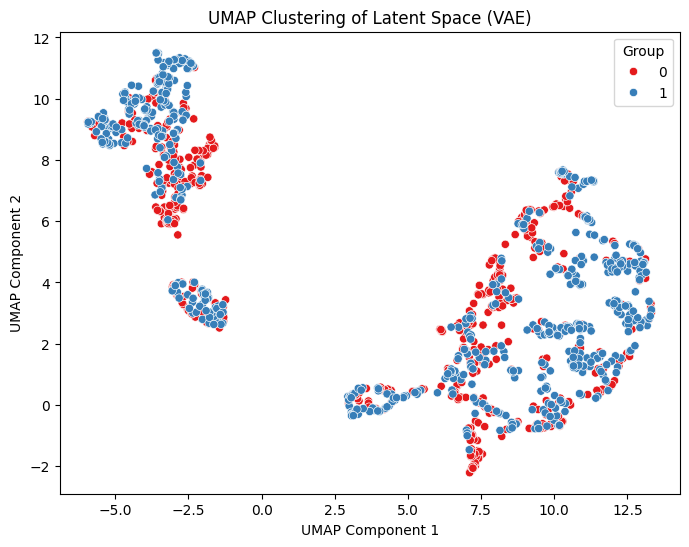

In [ ]:
scvi.model.SCVI.setup_anndata(adata, labels_key="label")

# -------------------------------
# Step 7: Train SCVI Model (VAE)
# -------------------------------
vae = scvi.model.SCVI(
    adata,
    n_hidden=128,
    n_latent=20,
    n_layers=3,
    dropout_rate=0.2,
)

vae.train(
    max_epochs=200,
    early_stopping=True,
    early_stopping_patience=15,
    train_size=0.9,
)

# -------------------------------
# Step 8: Extract Latent Representation & UMAP
# -------------------------------
latent = vae.get_latent_representation()
print(f"Latent representation shape: {latent.shape}")


# UMAP on latent space
reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = reducer.fit_transform(latent)

umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
umap_df['group'] = adata.obs['label'].values

# -------------------------------
# Step 9: Plot UMAP
# -------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
plt.title('UMAP Clustering of Latent Space (VAE)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Group')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(latent, adata.obs['label'])
print(f"Silhouette Score: {silhouette_avg}")

# Get reconstructed data as NumPy array
reconstructed_data = vae.get_normalized_expression().to_numpy()
original_data = adata.X

# Flatten arrays to match shapes for MSE computation
reconstructed_data_flat = reconstructed_data.flatten()
original_data_flat = original_data.flatten()

# Compute Mean Squared Error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(original_data_flat, reconstructed_data_flat)
print(f"Reconstruction MSE: {mse}")

from sklearn.metrics import adjusted_rand_score

# Compute ARI
ari = adjusted_rand_score(adata.obs['label'], latent.argmax(axis=1))
print(f"Adjusted Rand Index: {ari}")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(latent, adata.obs['label'], test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression ROC-AUC: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Silhouette Score: 0.020802462473511696
Reconstruction MSE: 447.0575256347656
Adjusted Rand Index: 0.015515957573450504
Logistic Regression Accuracy: 0.685823754789272
Logistic Regression ROC-AUC: 0.7423637218045114
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.59      0.66       133
           1       0.65      0.78      0.71       128

    accuracy                           0.69       261
   macro avg       0.69      0.69      0.68       261
weighted avg       0.69      0.69      0.68       261



In [ ]:
# Create separate AnnData objects for each cell subtype
subtypes = adata.obs['cell_subtype'].unique()

subtype_adata = {}
for subtype in subtypes:
    subtype_adata[subtype] = adata[adata.obs['cell_subtype'] == subtype].copy()

# Print headers of each subtype for verification
for subtype, sub_adata in subtype_adata.items():
    print(f"\nSubtype: {subtype}")
    print(sub_adata)



Subtype: beta
AnnData object with n_obs × n_vars = 416 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: alpha
AnnData object with n_obs × n_vars = 763 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: delta
AnnData object with n_obs × n_vars = 48 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: PP
AnnData object with n_obs × n_vars = 75 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'


In [ ]:
# Create separate AnnData objects for each cell subtype
subtypes = adata.obs['cell_subtype'].unique()

subtype_adata = {}
for subtype in subtypes:
    # Filter for the specific cell subtype
    sub_adata = adata[adata.obs['cell_subtype'] == subtype].copy()

    # Normalize total counts per cell for the specific subset
    sc.pp.normalize_total(sub_adata, target_sum=1e4, exclude_highly_expressed=False)

    # Log-transform the data (optional, if your workflow requires it)
    #sc.pp.log1p(sub_adata)

    # Store the normalized subset
    subtype_adata[subtype] = sub_adata

# Print headers of each subtype for verification
for subtype, sub_adata in subtype_adata.items():
    print(f"\nSubtype: {subtype}")
    print(sub_adata)


Subtype: beta
AnnData object with n_obs × n_vars = 416 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: alpha
AnnData object with n_obs × n_vars = 763 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: delta
AnnData object with n_obs × n_vars = 48 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'

Subtype: PP
AnnData object with n_obs × n_vars = 75 × 22647
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
    var: 'n_cells'


In [ ]:
# Train a VAE for each cell subtype
vae_models = {}
performance_results = {}
scvi.settings.seed = 42
for subtype, sub_adata in subtype_adata.items():
    print(f"\nTraining VAE for Subtype: {subtype}")

    # Setup and train the VAE
    scvi.model.SCVI.setup_anndata(sub_adata, labels_key="label")
    vae = scvi.model.SCVI(
    sub_adata,
    n_hidden=256,
    n_latent=50,
    n_layers=8,
    dropout_rate=0.45,
    )

    vae.train(
      max_epochs=650,
      early_stopping=True,
      early_stopping_patience=60,
      train_size=0.9,
    )


    # Save the trained model for this subtype
    vae_models[subtype] = vae

    # -------------------
    # Performance Metrics
    # -------------------
    # Latent Representation
    latent = vae.get_latent_representation()

    # Silhouette Score
    silhouette_avg = silhouette_score(latent, sub_adata.obs['label'])

    # Reconstruction MSE
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = sub_adata.X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())

    # Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(sub_adata.obs['label'], latent.argmax(axis=1))

    # Logistic Regression Metrics
    X_train, X_test, y_train, y_test = train_test_split(latent, sub_adata.obs['label'], test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Save performance metrics
    performance_results[subtype] = {
        "Silhouette Score": silhouette_avg,
        "Reconstruction MSE": mse,
        "Adjusted Rand Index": ari,
        "Logistic Regression Accuracy": accuracy,
        "Logistic Regression ROC-AUC": roc_auc
    }

    # Print the metrics
    print(f"Performance Metrics for Subtype: {subtype}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Reconstruction MSE: {mse}")
    print(f"Adjusted Rand Index: {ari}")
    print(f"Logistic Regression Accuracy: {accuracy}")
    print(f"Logistic Regression ROC-AUC: {roc_auc}")


INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)



Training VAE for Subtype: beta


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/700 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Monitored metric elbo_validation did not improve in the last 100 records. Best score: 7841.336. Signaling Trainer to stop.


ValueError: Found input variables with inconsistent numbers of samples: [75, 416]

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42



Training VAE for Subtype: beta


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

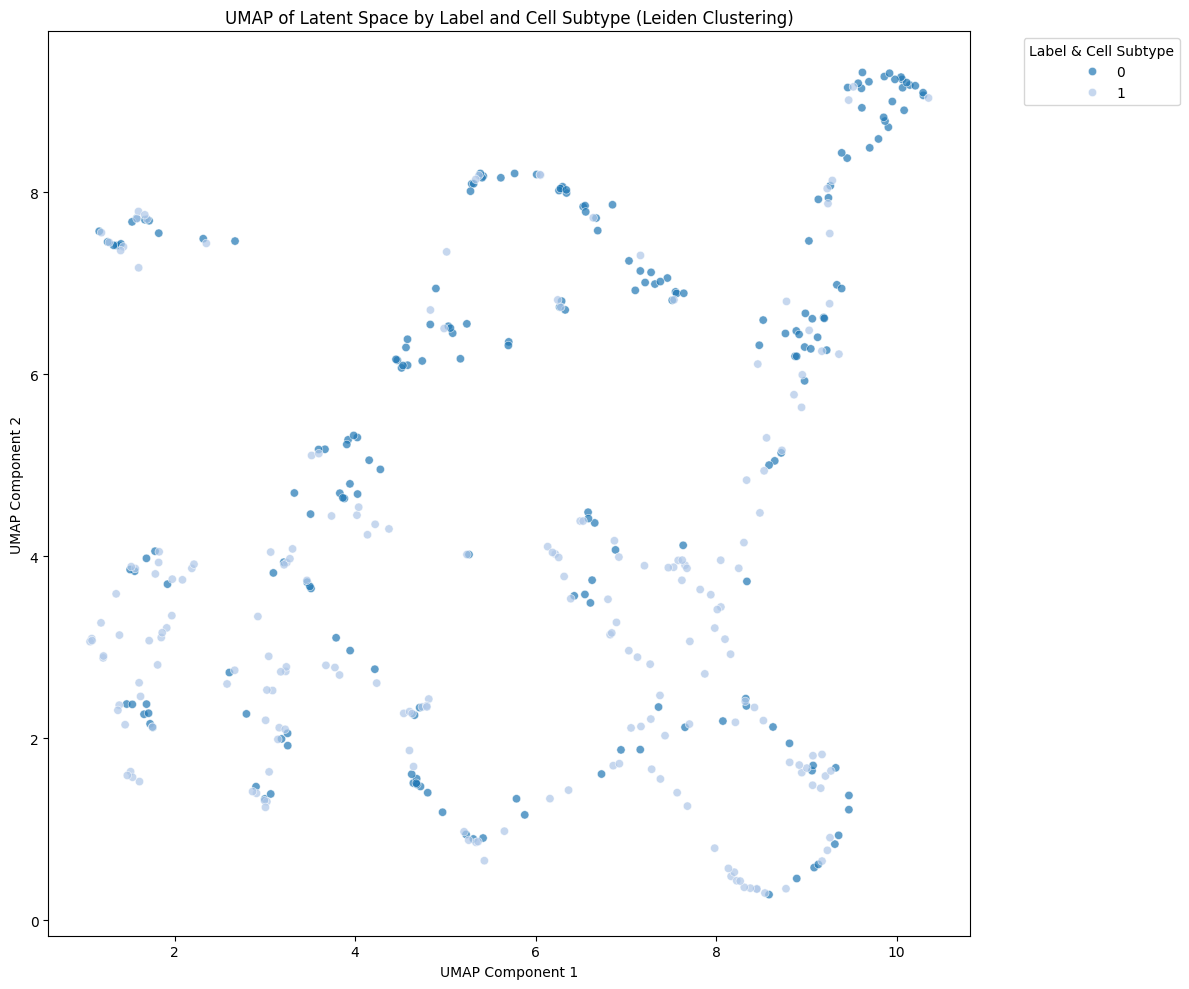

Silhouette Score (Leiden Clustering): 0.19645601511001587
Silhouette Score (Label and Cell Subtype): 0.04580400884151459
Reconstruction MSE: 116.96406555175781
ARI: 0.013276199812986092
NMI: 0.011592832971469789


/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


LR Accuracy: 0.6666666666666666
LR ROC-AUC: 0.7080498866213152
Classification Report LR:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        42
           1       0.68      0.62      0.65        42

    accuracy                           0.67        84
   macro avg       0.67      0.67      0.67        84
weighted avg       0.67      0.67      0.67        84

SVM Accuracy: 0.7142857142857143
SVM ROC-AUC: 0.7375283446712019
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        42
           1       0.74      0.67      0.70        42

    accuracy                           0.71        84
   macro avg       0.72      0.71      0.71        84
weighted avg       0.72      0.71      0.71        84


Training VAE for Subtype: alpha


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

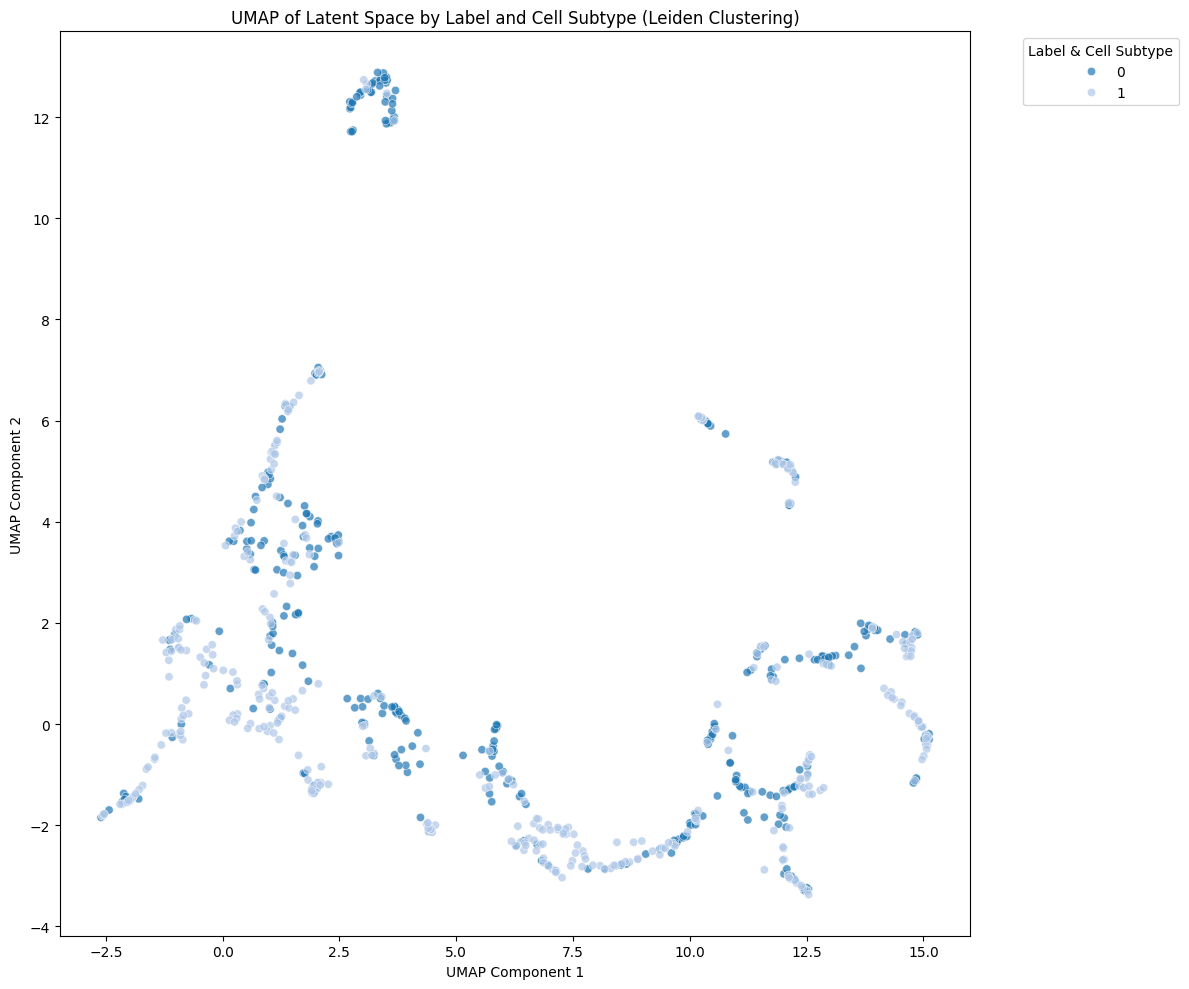

Silhouette Score (Leiden Clustering): 0.23679108917713165
Silhouette Score (Label and Cell Subtype): 0.026373209431767464
Reconstruction MSE: 667.4307250976562
ARI: 0.003921448901235783
NMI: 0.0041150172977345075
LR Accuracy: 0.738562091503268
LR ROC-AUC: 0.7754613807245386
Classification Report LR:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70        76
           1       0.69      0.87      0.77        77

    accuracy                           0.74       153
   macro avg       0.76      0.74      0.73       153
weighted avg       0.76      0.74      0.73       153



/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


SVM Accuracy: 0.7647058823529411
SVM ROC-AUC: 0.7889610389610389
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        76
           1       0.75      0.79      0.77        77

    accuracy                           0.76       153
   macro avg       0.77      0.76      0.76       153
weighted avg       0.77      0.76      0.76       153


Training VAE for Subtype: delta


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

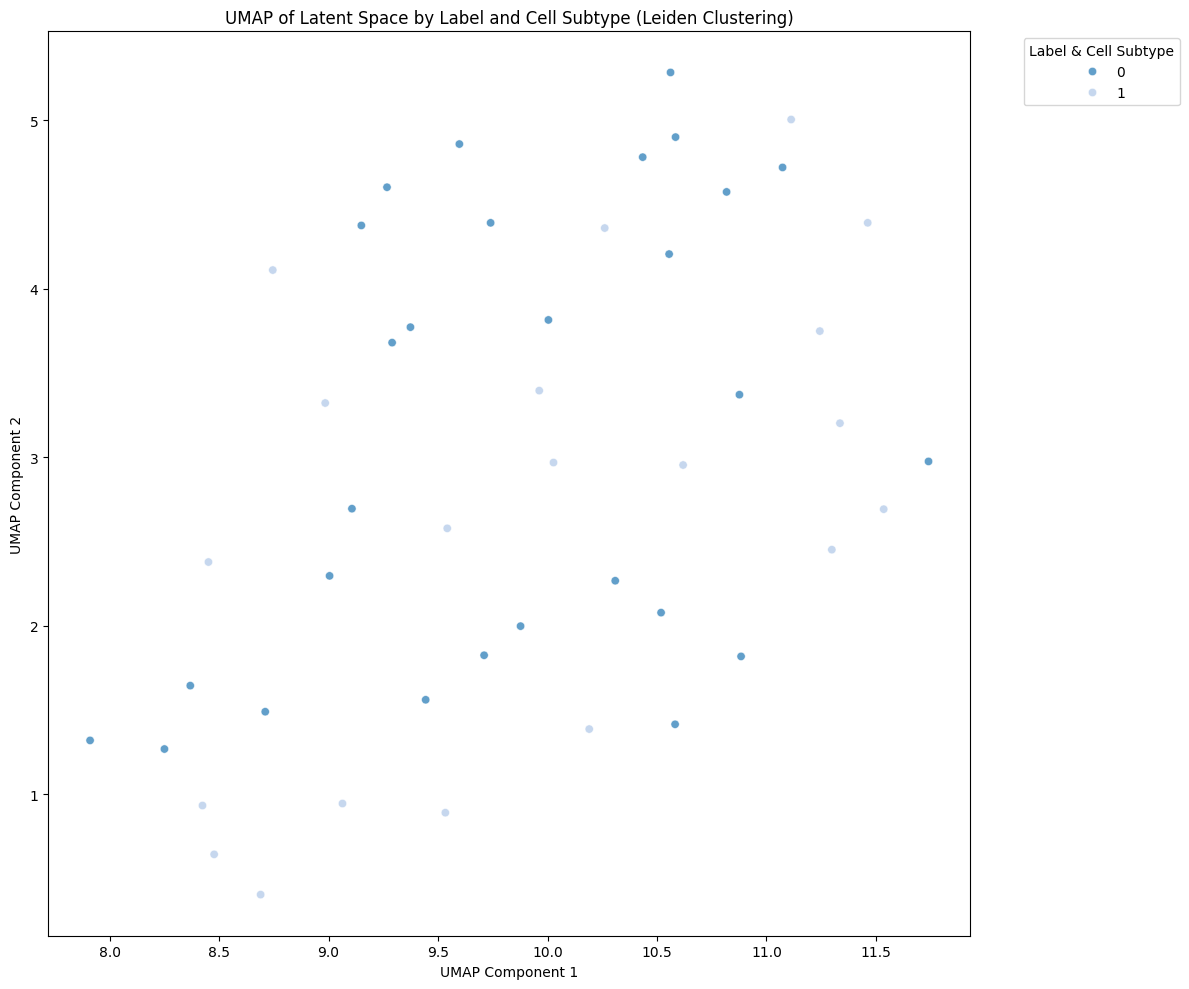

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Silhouette Score (Leiden Clustering): 0.17497490346431732
Silhouette Score (Label and Cell Subtype): 0.009959099814295769
Reconstruction MSE: 340.5142822265625
ARI: 0.007192073630739828
NMI: 0.017690361289338766
LR Accuracy: 0.4
LR ROC-AUC: 0.33333333333333337
Classification Report LR:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.25      0.25      0.25         4

    accuracy                           0.40        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.40      0.40      0.40        10

SVM Accuracy: 0.5
SVM ROC-AUC: 0.4583333333333333
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50  

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/500 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

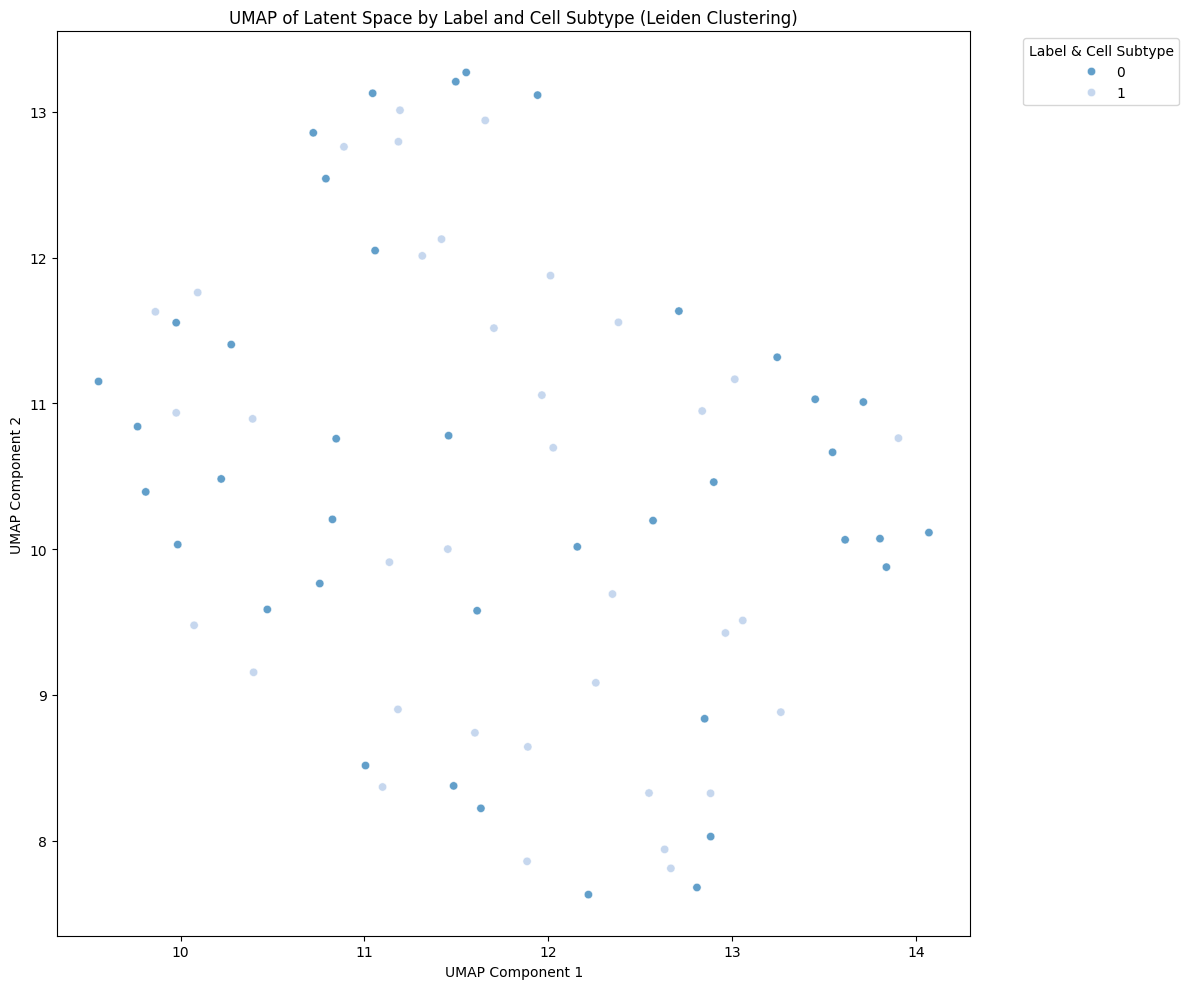

Silhouette Score (Leiden Clustering): 0.12309824675321579
Silhouette Score (Label and Cell Subtype): 0.0017118128016591072
Reconstruction MSE: 232.57638549804688
ARI: -0.0109085021553905
NMI: 0.0006354797876214921
LR Accuracy: 0.5333333333333333
LR ROC-AUC: 0.375
Classification Report LR:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.50      0.43      0.46         7

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15

SVM Accuracy: 0.5333333333333333
SVM ROC-AUC: 0.625
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.55      0.75      0.63         8
           1       0.50      0.29      0.36         7

    accuracy                           0.53        15
   macro avg       0.52      0.52      0.50        15
weighted avg       0.52      0

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.svm import SVC

# Train a VAE for each cell subtype
vae_models = {}
performance_results = {}
scvi.settings.seed = 42
for subtype, sub_adata in subtype_adata.items():

    print(f"\nTraining VAE for Subtype: {subtype}")
    adata = sub_adata.copy()
    # Setup and train the VAE
    vae_params = {
        "n_hidden": 150,
        "n_layers": 5,
        "n_latent": 30,       # Increase latent space dimension
        "dropout_rate": 0.2,  # Add dropout for regularization
        "gene_likelihood": "zinb"  # Often used for scRNA-seq data
    }

    scvi.model.SCVI.setup_anndata(adata, labels_key="label")
    scvi.settings.seed = 42

    # Initialize SCVI model with improved parameters
    vae = scvi.model.SCVI(
        adata,
        n_hidden=vae_params["n_hidden"],
        n_latent=vae_params["n_latent"],
        n_layers=vae_params["n_layers"],
        dropout_rate=vae_params["dropout_rate"],
        gene_likelihood=vae_params["gene_likelihood"]
    )

    # Train the model: You can also consider using early stopping
    vae.train(max_epochs=500,  # Increase epochs if needed
              train_size=0.9,
              early_stopping=False,
              early_stopping_patience=100,
              early_stopping_monitor="elbo_validation")

    latent = vae.get_latent_representation()

    # Perform Leiden clustering
    adata.obsm['X_pca'] = latent  # Use the latent space for Leiden clustering
    sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca')  # Define the graph
    sc.tl.leiden(adata, resolution=1.0)  # Perform Leiden clustering
    adata.obs['leiden'] = adata.obs['leiden'].astype(str)  # Convert Leiden labels to strings

    # Add Leiden clusters to AnnData
    adata.obs['leiden'] = adata.obs['leiden'].astype(str)
    """
    # Evaluate with UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
    adata.obs['label_str'] = adata.obs['label'].map({0: 'control', 1: 'T2D'})
    adata.obs['label_cell_subtype'] = adata.obs['label_str'].astype(str) + 'x' + adata.obs['cell_subtype'].astype(str)
    umap_df['group'] = adata.obs['label_cell_subtype'].values

    plt.figure(figsize=(10,8))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
    plt.title('UMAP of Improved VAE Latent Space')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Label & Cell Subtype', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    """
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)

    # Create a DataFrame for UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
    # Add 'label_cell_subtype' and 'leiden' to the DataFrame
    umap_df['group'] = adata.obs['label'].values  # For coloring
    umap_df['leiden'] = adata.obs['leiden']  # For reference, if needed

    # Plot UMAP with label_cell_subtype coloring
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x='UMAP1',
        y='UMAP2',
        hue='group',       # Color by label_cell_subtype
        data=umap_df,
        palette='tab20',   # Use a qualitative colormap like 'tab20'
        legend='full',     # Show full legend
        alpha=0.7          # Slight transparency for better visual separation
    )

    # Plot Titles and Labels
    plt.title('UMAP of Latent Space by Label and Cell Subtype (Leiden Clustering)')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

    # Adjust legend position
    plt.legend(
        title='Label & Cell Subtype',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()

    # -------------------------------
    # Step 5: Evaluate Clustering
    # -------------------------------

    # Compute silhouette score for Leiden clusters
    silhouette_leiden = silhouette_score(latent, adata.obs['leiden'])
    print(f"Silhouette Score (Leiden Clustering): {silhouette_leiden}")

    # Compute silhouette score for label_cell_subtype
    silhouette_label_cell = silhouette_score(latent, adata.obs['label'])
    print(f"Silhouette Score (Label and Cell Subtype): {silhouette_label_cell}")

    # Reconstruction error (MSE)
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = adata.X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())
    print(f"Reconstruction MSE: {mse}")

    # Clustering metrics (ARI, NMI)
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(latent)
    ari = adjusted_rand_score(adata.obs['label'], kmeans_labels)
    nmi = normalized_mutual_info_score(adata.obs['label'], kmeans_labels)
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")

    # Classification stage (optional, no oversampling)
    X = latent
    y = adata.obs['label'].astype(int).values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Try Logistic Regression
    clf_lr = LogisticRegression(max_iter=1000, random_state=42)
    clf_lr.fit(X_train, y_train)
    y_pred_lr = clf_lr.predict(X_test)
    y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
    print(f"LR Accuracy: {accuracy_lr}")
    print(f"LR ROC-AUC: {roc_auc_lr}")
    print("Classification Report LR:\n", classification_report(y_test, y_pred_lr))

    # Try SVM
    svm = SVC(probability=True, random_state=42, kernel='rbf', C=1)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
    print(f"SVM Accuracy: {accuracy_svm}")
    print(f"SVM ROC-AUC: {roc_auc_svm}")
    print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))





INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42



Training VAE for Subtype: beta


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/700 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

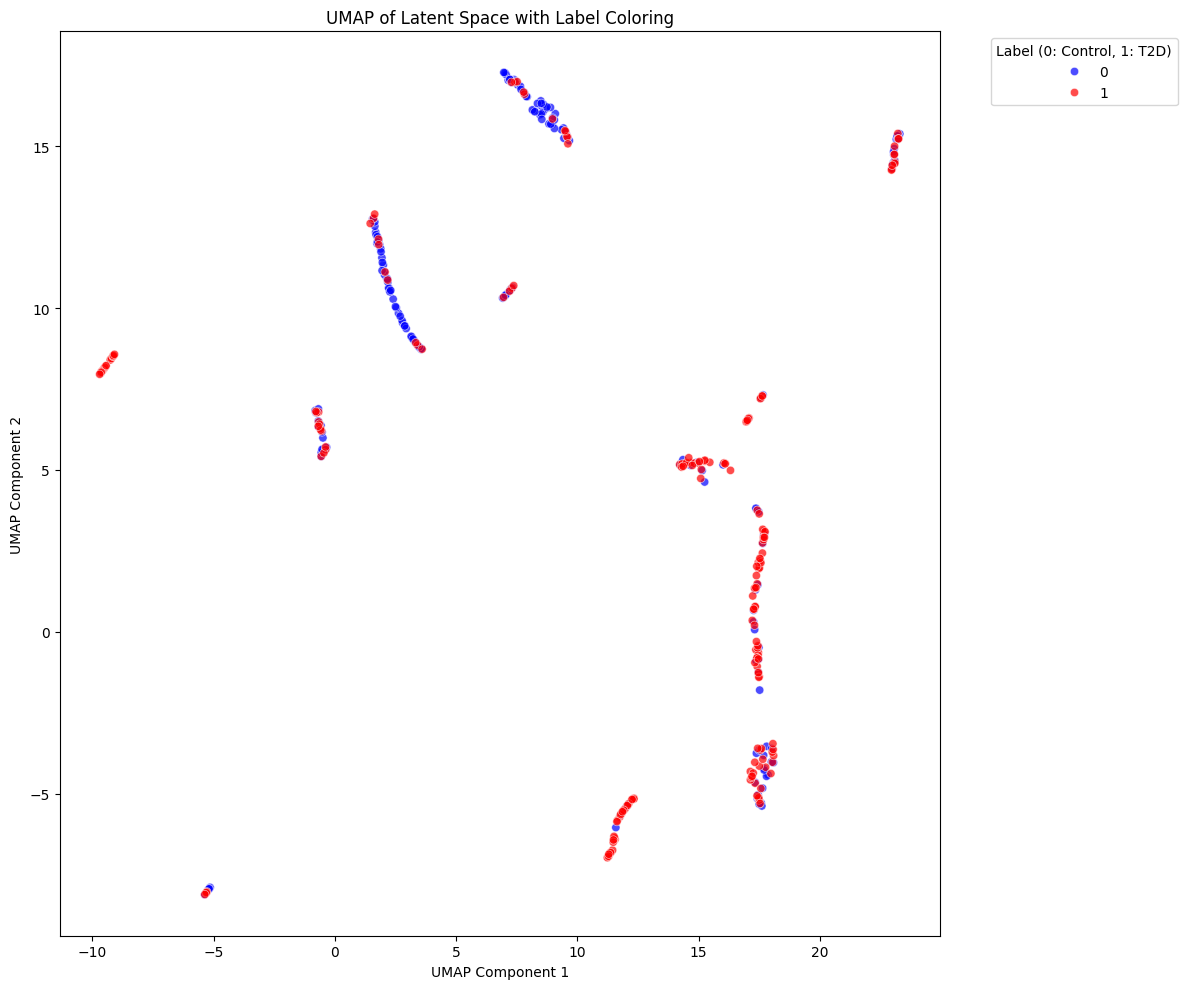

Silhouette Score (Leiden Clustering): 0.3246265649795532
Silhouette Score (Label and Cell Subtype): 0.060177192091941833
Reconstruction MSE: 116.9621353149414


/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


ARI: 0.00478779870241483
NMI: 0.007044645490071122
LR Accuracy: 0.7142857142857143
LR ROC-AUC: 0.7329931972789115
Classification Report LR:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71        42
           1       0.70      0.74      0.72        42

    accuracy                           0.71        84
   macro avg       0.71      0.71      0.71        84
weighted avg       0.71      0.71      0.71        84

SVM Accuracy: 0.6904761904761905
SVM ROC-AUC: 0.7709750566893424
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        42
           1       0.68      0.71      0.70        42

    accuracy                           0.69        84
   macro avg       0.69      0.69      0.69        84
weighted avg       0.69      0.69      0.69        84


Training VAE for Subtype: alpha


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (6) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/700 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

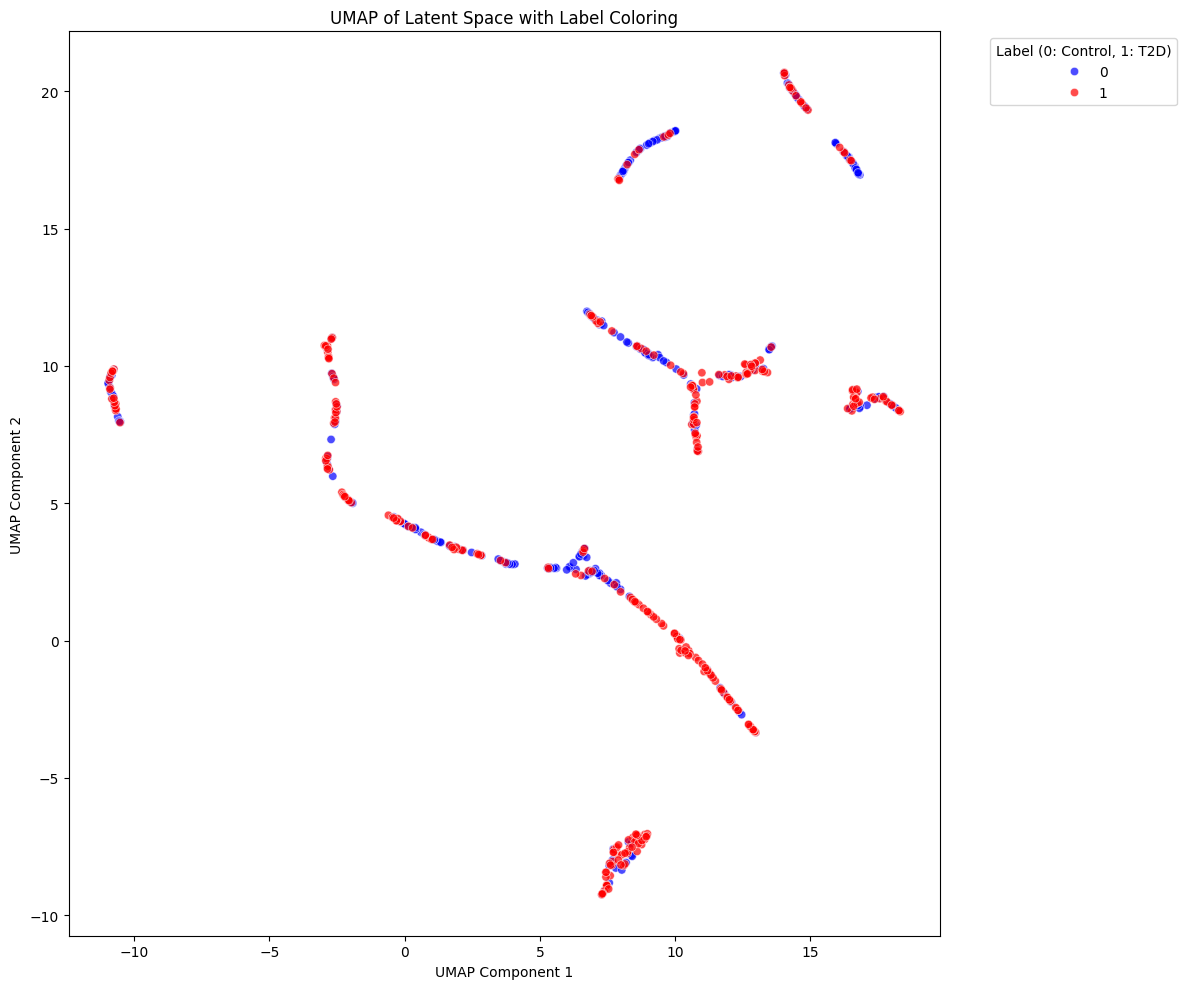

Silhouette Score (Leiden Clustering): 0.35988152027130127
Silhouette Score (Label and Cell Subtype): 0.030792025849223137
Reconstruction MSE: 667.4219360351562
ARI: 0.023061951965489828
NMI: 0.018403344704578713
LR Accuracy: 0.6274509803921569
LR ROC-AUC: 0.7093301435406699
Classification Report LR:
               precision    recall  f1-score   support

           0       0.60      0.74      0.66        76
           1       0.67      0.52      0.58        77

    accuracy                           0.63       153
   macro avg       0.63      0.63      0.62       153
weighted avg       0.63      0.63      0.62       153



/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


SVM Accuracy: 0.6666666666666666
SVM ROC-AUC: 0.7510252904989747
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        76
           1       0.70      0.58      0.64        77

    accuracy                           0.67       153
   macro avg       0.67      0.67      0.66       153
weighted avg       0.67      0.67      0.66       153


Training VAE for Subtype: delta


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/700 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

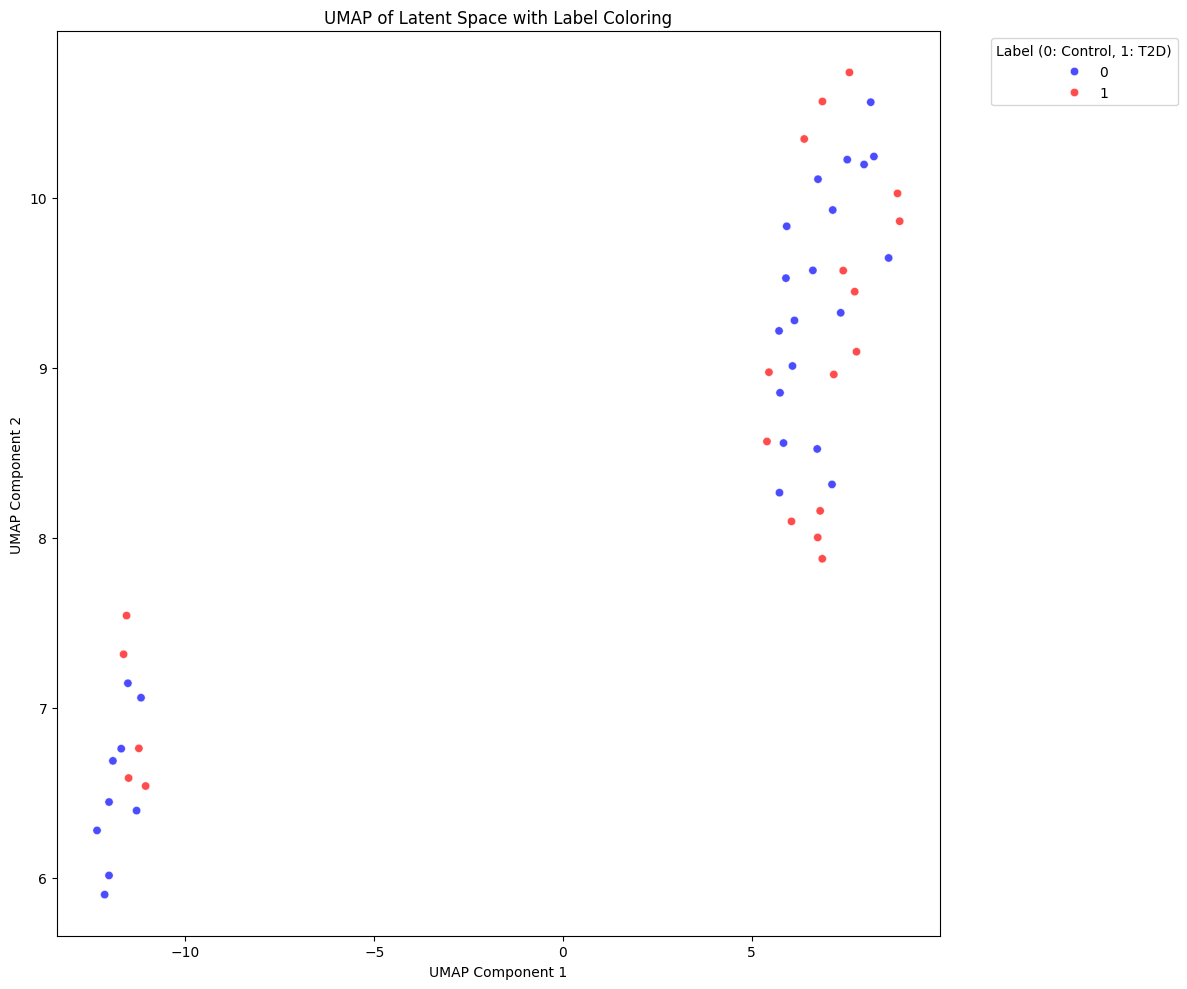

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


Silhouette Score (Leiden Clustering): 0.28634709119796753
Silhouette Score (Label and Cell Subtype): 0.049332067370414734
Reconstruction MSE: 340.5030212402344
ARI: 0.02318476142578739
NMI: 0.03521235167948443
LR Accuracy: 0.5
LR ROC-AUC: 0.5833333333333334
Classification Report LR:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10

SVM Accuracy: 0.4
SVM ROC-AUC: 0.5416666666666667
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.25      0.25      0.25         4

    accuracy                           0.40        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.40      0.40     

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/700 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

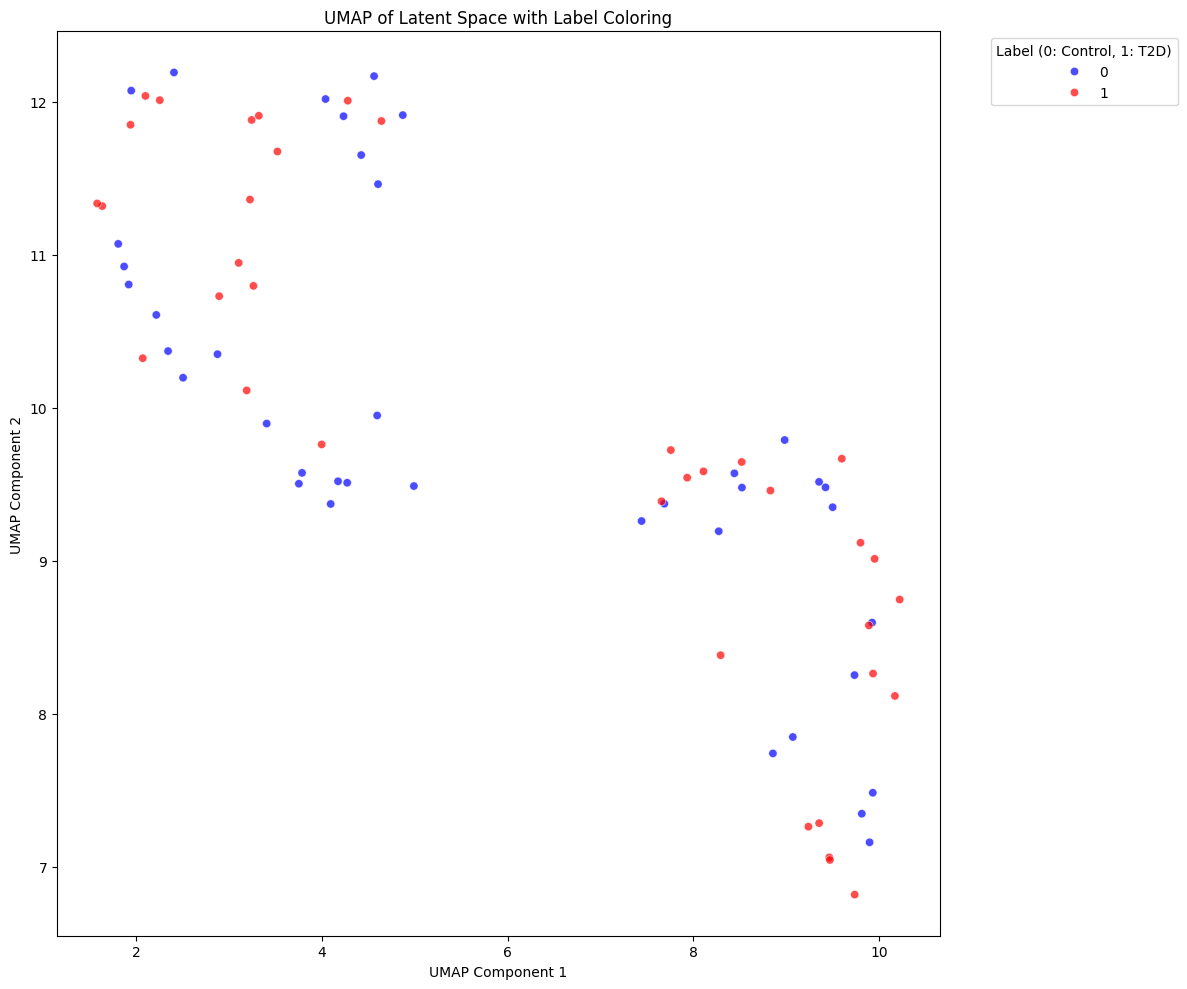

Silhouette Score (Leiden Clustering): 0.28288474678993225
Silhouette Score (Label and Cell Subtype): -0.00935076642781496
Reconstruction MSE: 232.5675048828125
ARI: 0.0022568971555313438
NMI: 0.00965814510894011
LR Accuracy: 0.5333333333333333
LR ROC-AUC: 0.6607142857142857
Classification Report LR:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.00      0.00      0.00         7

    accuracy                           0.53        15
   macro avg       0.27      0.50      0.35        15
weighted avg       0.28      0.53      0.37        15

SVM Accuracy: 0.5333333333333333
SVM ROC-AUC: 0.7142857142857142
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       0.00      0.00      0.00         7

    accuracy                           0.53        15
   macro avg       0.27      0.50      0.35        15
weight

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.svm import SVC

# Train a VAE for each cell subtype
vae_models = {}
performance_results = {}
scvi.settings.seed = 42
for subtype, sub_adata in subtype_adata.items():

    print(f"\nTraining VAE for Subtype: {subtype}")
    adata = sub_adata.copy()
    # Setup and train the VAE
    vae_params = {
        "n_hidden": 256,
        "n_layers": 8,
        "n_latent": 30,       # Increase latent space dimension
        "dropout_rate": 0.3,  # Add dropout for regularization
        "gene_likelihood": "zinb"  # Often used for scRNA-seq data
    }

    scvi.model.SCVI.setup_anndata(adata, labels_key="label")
    scvi.settings.seed = 42

    # Initialize SCVI model with improved parameters
    vae = scvi.model.SCVI(
        adata,
        n_hidden=vae_params["n_hidden"],
        n_latent=vae_params["n_latent"],
        n_layers=vae_params["n_layers"],
        dropout_rate=vae_params["dropout_rate"],
        gene_likelihood=vae_params["gene_likelihood"]
    )

    # Train the model: You can also consider using early stopping
    vae.train(max_epochs=1000,  # Increase epochs if needed
              train_size=0.9,
              early_stopping=True,
              early_stopping_patience=100,
              early_stopping_monitor="elbo_validation")

    latent = vae.get_latent_representation()

    # Perform Leiden clustering
    adata.obsm['X_pca'] = latent  # Use the latent space for Leiden clustering
    sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca')  # Define the graph
    sc.tl.leiden(adata, resolution=2)  # Perform Leiden clustering
    adata.obs['leiden'] = adata.obs['leiden'].astype(str)  # Convert Leiden labels to strings

    # Add Leiden clusters to AnnData
    adata.obs['leiden'] = adata.obs['leiden'].astype(str)
    """
    # Evaluate with UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
    adata.obs['label_str'] = adata.obs['label'].map({0: 'control', 1: 'T2D'})
    adata.obs['label_cell_subtype'] = adata.obs['label_str'].astype(str) + 'x' + adata.obs['cell_subtype'].astype(str)
    umap_df['group'] = adata.obs['label_cell_subtype'].values

    plt.figure(figsize=(10,8))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
    plt.title('UMAP of Improved VAE Latent Space')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Label & Cell Subtype', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    """
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)

    # Create a DataFrame for UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
    # Add 'label_cell_subtype' and 'leiden' to the DataFrame
    umap_df['group'] = adata.obs['label'].values  # For coloring
    umap_df['leiden'] = adata.obs['leiden']  # For reference, if needed

    # Define a custom palette
    palette = {0: 'blue', 1: 'red'}

    # Plot UMAP with the custom palette
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x='UMAP1',
        y='UMAP2',
        hue='group',  # Based on the 'label'
        data=umap_df,
        palette=palette,
        legend='full',
        alpha=0.7
    )

    # Titles and labels
    plt.title('UMAP of Latent Space with Label Coloring')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

    # Adjust legend position
    plt.legend(
        title='Label (0: Control, 1: T2D)',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()

    # -------------------------------
    # Step 5: Evaluate Clustering
    # -------------------------------

    # Compute silhouette score for Leiden clusters
    silhouette_leiden = silhouette_score(latent, adata.obs['leiden'])
    print(f"Silhouette Score (Leiden Clustering): {silhouette_leiden}")

    # Compute silhouette score for label_cell_subtype
    silhouette_label_cell = silhouette_score(latent, adata.obs['label'])
    print(f"Silhouette Score (Label and Cell Subtype): {silhouette_label_cell}")

    # Reconstruction error (MSE)
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = adata.X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())
    print(f"Reconstruction MSE: {mse}")

    # Clustering metrics (ARI, NMI)
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(latent)
    ari = adjusted_rand_score(adata.obs['label'], kmeans_labels)
    nmi = normalized_mutual_info_score(adata.obs['label'], kmeans_labels)
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")

    # Classification stage (optional, no oversampling)
    X = latent
    y = adata.obs['label'].astype(int).values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Try Logistic Regression
    clf_lr = LogisticRegression(max_iter=1000, random_state=42)
    clf_lr.fit(X_train, y_train)
    y_pred_lr = clf_lr.predict(X_test)
    y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
    print(f"LR Accuracy: {accuracy_lr}")
    print(f"LR ROC-AUC: {roc_auc_lr}")
    print("Classification Report LR:\n", classification_report(y_test, y_pred_lr))

    # Try SVM
    svm = SVC(probability=True, random_state=42, kernel='rbf', C=1)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
    print(f"SVM Accuracy: {accuracy_svm}")
    print(f"SVM ROC-AUC: {roc_auc_svm}")
    print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Plotting UMAP for Subtype: beta


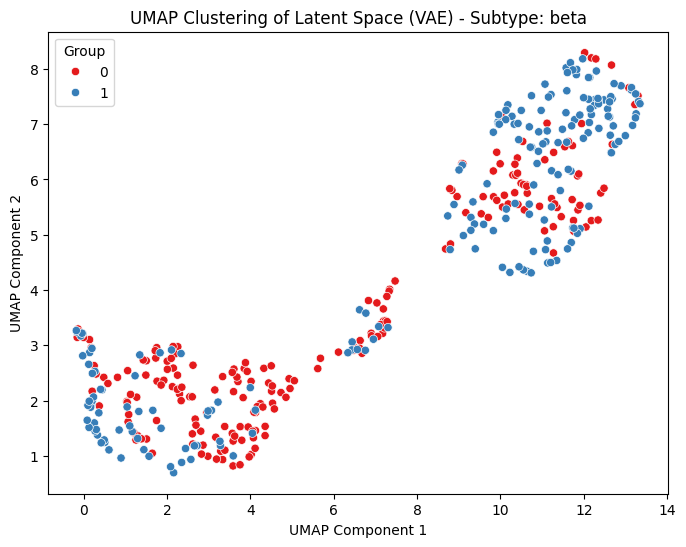


Plotting UMAP for Subtype: alpha


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


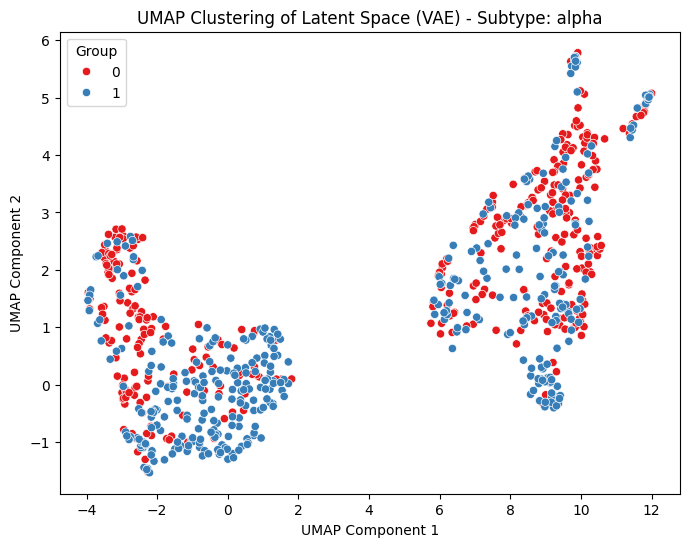


Plotting UMAP for Subtype: delta


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


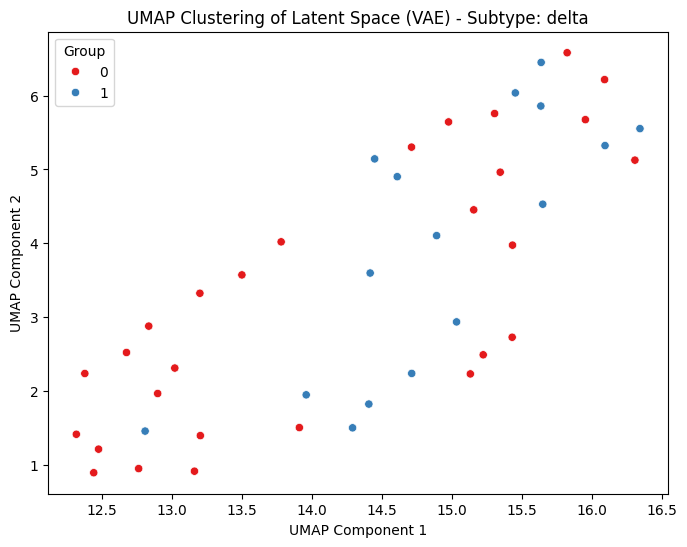


Plotting UMAP for Subtype: PP


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


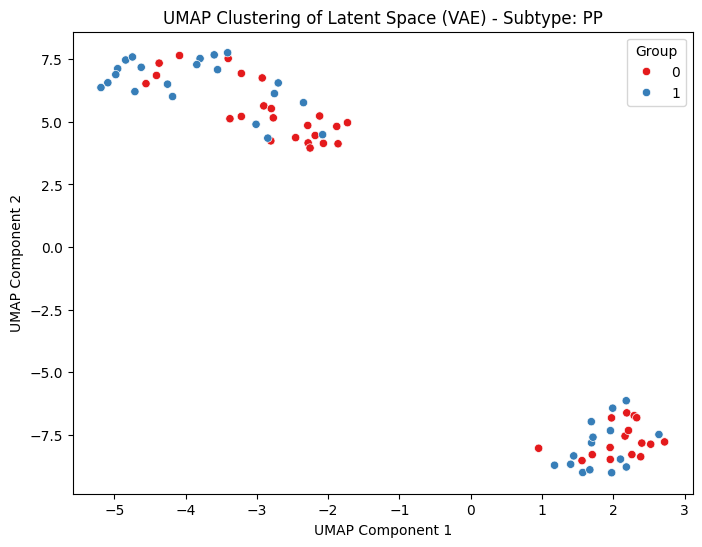

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for subtype, vae in vae_models.items():
    print(f"\nPlotting UMAP for Subtype: {subtype}")

    # Get latent representation and apply UMAP
    latent = vae.get_latent_representation()
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)

    # Create a DataFrame for UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['group'] = subtype_adata[subtype].obs['label'].values

    # Plot the UMAP clustering
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
    plt.title(f'UMAP Clustering of Latent Space (VAE) - Subtype: {subtype}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Group')
    plt.show()


In [ ]:
import scvi
from scvi.model import SCVI
from scvi.data import AnnDataManager
from scvi.model.base._base_model import BaseModelClass
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from anndata import AnnData

# Define the EnhancedVAE Class
class EnhancedVAE(scvi.module.VAE):
    def __init__(self, n_input, n_latent=10, n_hidden=128, n_layers=3, dropout_rate=0.2):
        super().__init__(
            n_input=n_input,
            n_latent=n_latent,
            n_hidden=n_hidden,
            n_layers=n_layers,
            dropout_rate=dropout_rate,
        )


# Define the EnhancedSCVI Class
class EnhancedSCVI(SCVI):
    def __init__(self, adata, n_hidden=128, n_latent=10, n_layers=3, dropout_rate=0.2):
        EnhancedSCVI.setup_anndata(adata, labels_key="label")  # Ensure setup for EnhancedSCVI
        super().__init__(adata)
        self.module = EnhancedVAE(
            n_input=self.summary_stats.n_vars,
            n_latent=n_latent,
            n_hidden=n_hidden,
            n_layers=n_layers,
            dropout_rate=dropout_rate,
        )

    @classmethod
    def setup_anndata(cls, adata, **kwargs):
        """Ensure setup_anndata is linked to this class."""
        SCVI.setup_anndata(adata, **kwargs)


# Function to train Enhanced VAE
def train_enhanced_vae(adata, n_latent=10, max_epochs=200):
    # Explicitly call EnhancedSCVI's setup to avoid conflicts
    EnhancedSCVI.setup_anndata(adata, labels_key="label")
    enhanced_vae = EnhancedSCVI(adata, n_latent=n_latent)
    enhanced_vae.train(
        max_epochs=max_epochs,
        train_size=0.9,
        early_stopping=True,
        early_stopping_patience=10,
        lr_scheduler="reduce_on_plateau",
    )
    return enhanced_vae


# Prepare Subtype-specific Data
subtype_adata = {}
for subtype in adata.obs['cell_subtype'].unique():
    print(f"Creating dataset for subtype: {subtype}")
    sub_adata = adata[adata.obs['cell_subtype'] == subtype].copy()
    # Normalize data to avoid warnings
    scvi.data.setup_anndata(sub_adata, labels_key="label")
    subtype_adata[subtype] = sub_adata

# Confirm datasets were created
for subtype, sub_adata in subtype_adata.items():
    print(f"\nSubtype: {subtype}")
    print(sub_adata)

# Train Enhanced VAE for Each Subtype
vae_models = {}
for subtype, sub_adata in subtype_adata.items():
    print(f"\nTraining Enhanced VAE for Subtype: {subtype}")
    try:
        vae = train_enhanced_vae(sub_adata, n_latent=10, max_epochs=200)
        vae_models[subtype] = vae
    except Exception as e:
        print(f"Failed to train VAE for subtype {subtype}: {e}")

# Evaluate and Visualize Performance
for subtype, vae in vae_models.items():
    print(f"\nEvaluating Enhanced VAE for Subtype: {subtype}")

    # Get Latent Representation
    latent = vae.get_latent_representation()
    print(f"Latent representation shape for {subtype}: {latent.shape}")

    # UMAP on Latent Space
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)

    # Prepare UMAP DataFrame
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=subtype_adata[subtype].obs_names)
    umap_df['group'] = subtype_adata[subtype].obs['label'].values

    # Plot UMAP
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
    plt.title(f'UMAP Clustering of Latent Space for Subtype: {subtype}')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Group')
    plt.show()

    # Performance Metrics
    from sklearn.metrics import silhouette_score, mean_squared_error, adjusted_rand_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

    # Silhouette Score
    silhouette_avg = silhouette_score(latent, subtype_adata[subtype].obs['label'])
    print(f"Silhouette Score for {subtype}: {silhouette_avg}")

    # Reconstruction MSE
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = subtype_adata[subtype].X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())
    print(f"Reconstruction MSE for {subtype}: {mse}")

    # Adjusted Rand Index
    ari = adjusted_rand_score(subtype_adata[subtype].obs['label'], latent.argmax(axis=1))
    print(f"Adjusted Rand Index for {subtype}: {ari}")

    # Logistic Regression
    X_train, X_test, y_train, y_test = train_test_split(latent, subtype_adata[subtype].obs['label'], test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"Logistic Regression Accuracy for {subtype}: {accuracy}")
    print(f"Logistic Regression ROC-AUC for {subtype}: {roc_auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Creating dataset for subtype: beta


AttributeError: module 'scvi.data' has no attribute 'setup_anndata'

In [ ]:
import numpy as np
import pandas as pd
from anndata import AnnData

# Assuming `adata` is your AnnData object

# Calculate total expression for each gene
total_expression = np.sum(adata.X, axis=0)  # Sum across all cells for each gene

# Get indices of top 25% most expressed genes
num_genes = adata.X.shape[1]
top_genes_count = int(num_genes * 0.25)
top_genes_idx = np.argsort(-total_expression)[:top_genes_count]  # Sort in descending order and select top 25%

# Subset the data to include only the top 25% genes
adata_top_genes = adata[:, top_genes_idx].copy()

# Confirm dimensions
print(f"Original dataset: {adata.shape}")
print(f"Reduced dataset: {adata_top_genes.shape}")


Original dataset: (1302, 24357)
Reduced dataset: (1302, 6089)


In [ ]:
# Set up AnnData for SCVI with the reduced dataset
scvi.model.SCVI.setup_anndata(adata_top_genes, labels_key="label")

# Train the VAE
vae = scvi.model.SCVI(
    adata_top_genes,
    n_hidden=128,
    n_latent=20,
    n_layers=3,
    dropout_rate=0.2,
)

vae.train(
    max_epochs=200,
    early_stopping=True,
    early_stopping_patience=15,
    train_size=0.9,
)


# Evaluate the VAE as usual
latent = vae.get_latent_representation()


/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improv

Training:   0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(latent, adata.obs['label'])
print(f"Silhouette Score: {silhouette_avg}")

# Get reconstructed data as NumPy array
reconstructed_data = vae.get_normalized_expression().to_numpy()
original_data = adata.X

# Flatten arrays to match shapes for MSE computation
reconstructed_data_flat = reconstructed_data.flatten()
original_data_flat = original_data.flatten()

# Compute Mean Squared Error
from sklearn.metrics import mean_squared_error

#mse = mean_squared_error(original_data_flat, reconstructed_data_flat)
print(f"Reconstruction MSE: {mse}")

from sklearn.metrics import adjusted_rand_score

# Compute ARI
ari = adjusted_rand_score(adata.obs['label'], latent.argmax(axis=1))
print(f"Adjusted Rand Index: {ari}")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(latent, adata.obs['label'], test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression ROC-AUC: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Silhouette Score: 0.013338497839868069
Reconstruction MSE: 416.16131591796875
Adjusted Rand Index: 0.005928796510343991
Logistic Regression Accuracy: 0.7241379310344828
Logistic Regression ROC-AUC: 0.7501174812030076
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       133
           1       0.71      0.73      0.72       128

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



In [ ]:
import numpy as np
import pandas as pd
from anndata import AnnData

# Assuming `adata` is your AnnData object

# Calculate total expression for each gene
total_expression = np.sum(adata.X, axis=0)  # Sum across all cells for each gene

# Get indices of top 25% most expressed genes
num_genes = adata.X.shape[1]
b_genes_count = int(num_genes * 0.25)
b_genes_idx = np.argsort(-total_expression)[:b_genes_count]  # Sort in descending order and select top 25%

# Subset the data to include only the top 25% genes
adata_b_genes = adata[:, b_genes_idx].copy()

# Confirm dimensions
print(f"Original dataset: {adata.shape}")
print(f"Reduced dataset: {adata_b_genes.shape}")


Original dataset: (1302, 24357)
Reduced dataset: (1302, 6089)


In [ ]:
# Set up AnnData for SCVI with the reduced dataset
scvi.model.SCVI.setup_anndata(adata_b_genes, labels_key="label")

# Train the VAE
vae = scvi.model.SCVI(adata_b_genes)
vae.train(max_epochs=100, train_size=0.9)

# Evaluate the VAE as usual
latent = vae.get_latent_representation()

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improv

Training:   0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(latent, adata.obs['label'])
print(f"Silhouette Score: {silhouette_avg}")

# Get reconstructed data as NumPy array
reconstructed_data = vae.get_normalized_expression().to_numpy()
original_data = adata.X

# Flatten arrays to match shapes for MSE computation
reconstructed_data_flat = reconstructed_data.flatten()
original_data_flat = original_data.flatten()

# Compute Mean Squared Error
from sklearn.metrics import mean_squared_error

#mse = mean_squared_error(original_data_flat, reconstructed_data_flat)
print(f"Reconstruction MSE: {mse}")

from sklearn.metrics import adjusted_rand_score

# Compute ARI
ari = adjusted_rand_score(adata.obs['label'], latent.argmax(axis=1))
print(f"Adjusted Rand Index: {ari}")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(latent, adata.obs['label'], test_size=0.2, random_state=42)

# Train logistic regression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Logistic Regression Accuracy: {accuracy}")
print(f"Logistic Regression ROC-AUC: {roc_auc}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Silhouette Score: 0.010483523830771446
Reconstruction MSE: 416.16131591796875
Adjusted Rand Index: 0.009991630371108702
Logistic Regression Accuracy: 0.7394636015325671
Logistic Regression ROC-AUC: 0.8114426691729323
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75       133
           1       0.75      0.70      0.72       128

    accuracy                           0.74       261
   macro avg       0.74      0.74      0.74       261
weighted avg       0.74      0.74      0.74       261



# New Section

In [ ]:
import pandas as pd
import random

# Load the dataset (replace with your actual file path)
data = pd.read_csv('GSE81608_human_islets_rpkm.txt', sep='\t', index_col=0)

# Add a label column based on sample number
labels = [0 if i < 651 else 1 for i in range(len(data.columns))]  # 0 for control, 1 for T2D
data = data.T
data['label'] = labels  # Add label column



# Save the balanced dataset (optional)
#data.to_csv('balanced_dataset_simple.csv', index=False)
print(data.head())

gene.id         1    2    3         9   10   11       12   13        14   15  \
Sample_1  47.3396  0.0  0.0    0.0000  0.0  0.0   0.0000  0.0   31.2047  0.0   
Sample_2  24.0458  0.0  0.0    0.0000  0.0  0.0  14.0425  0.0    0.0000  0.0   
Sample_3   2.2743  0.0  0.0    0.0000  0.0  0.0   0.8412  0.0    7.8214  0.0   
Sample_4   0.0000  0.0  0.0    0.0000  0.0  0.0   0.0000  0.0    0.0000  0.0   
Sample_5   0.0000  0.0  0.0  130.9796  0.0  0.0   0.0000  0.0  120.6832  0.0   

gene.id   ...  101929767  101929768  101929769  101929770  101929771  \
Sample_1  ...     5.1983        0.0        0.0        0.0        0.0   
Sample_2  ...     0.1064        0.0        0.0        0.0        0.0   
Sample_3  ...     0.3188        0.0        0.0        0.0        0.0   
Sample_4  ...     0.0000        0.0        0.0        0.0        0.0   
Sample_5  ...     0.0000        0.0        0.0        0.0        0.0   

gene.id   101930100  102723951  102724004  102724238  label  
Sample_1       0.00     

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = imputer.fit_transform(data.drop(columns=['label']))  # Drop 'label' for scaling

anndata = ad.AnnData(imputed_data)

#sc.pp.normalize_total(adata=anndata, target_sum=1e4, exclude_highly_expressed=False)
new_data = anndata.X

In [ ]:
import re

metadata_file = "/content/GSE81608_series_matrix.txt"

ages = []
genders = []
cell_subtypes = []


# Open the file with UTF-8 encoding
with open(metadata_file, 'r', encoding='utf-8') as f:

        for line in f:

            line = line.strip()

            # We look only at lines that describe sample characteristics
            if line.startswith('!Sample_characteristics_ch1'):

                # Extract all values in quotes
                characteristics = re.findall(r'"([^"]+)"', line)

                if characteristics:
                    first_char = characteristics[0]

                    # Split the first characteristic by ':'
                    if ':' in first_char:
                        attr_name, _ = first_char.split(':', 1)
                        attr_name = attr_name.strip().lower()  # e.g., "age", "gender", "cell subtype"

                        # Extract just the values (e.g., from "age: 23" get "23")
                        values = []
                        for ch in characteristics:
                            if ':' in ch:
                                _, val = ch.split(':', 1)
                                values.append(val.strip())

                        # Assign values to the appropriate list based on attr_name
                        if attr_name == 'age':
                            ages = values
                        elif attr_name == 'gender':
                            genders = values
                        elif attr_name == 'cell subtype':
                            cell_subtypes = values

# After this, you have three lists: ages, genders, and cell_subtypes
# Each list contains the values for all samples in the order they were found.
print("Ages:", ages)
print("Genders:", genders)
print("Cell Subtypes:", cell_subtypes)

Ages: ['23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '23', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '32', '23', '23', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '27', '68', '68', '68', '68', '68', '68', '68', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '29', '60', '60', '60', '60', '60', '60', '60', '60', '60', '23', '23', '23', '23', '23', '23', '23', '23', '60', '60', '60', '60', '60', '60', '60', '60', '24', '24', '24', '24', '24', '24', '24', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '43', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '31', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56', '56

In [ ]:
import pandas as pd

# Add the list as a column
data['Age'] = ages
data['Gender'] = genders
data['cell_subtype'] = cell_subtypes

print(data)

gene.id            1        2    3         9   10   11        12      13  \
Sample_1     47.3396   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_2     24.0458   0.0000  0.0    0.0000  0.0  0.0   14.0425  0.0000   
Sample_3      2.2743   0.0000  0.0    0.0000  0.0  0.0    0.8412  0.0000   
Sample_4      0.0000   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_5      0.0000   0.0000  0.0  130.9796  0.0  0.0    0.0000  0.0000   
...              ...      ...  ...       ...  ...  ...       ...     ...   
Sample_1596   0.0000   0.0000  0.0    0.0000  0.0  0.0  124.9825  0.2714   
Sample_1597   0.5372   0.0000  0.0    0.0000  0.0  0.0    3.5763  0.0000   
Sample_1598  31.1225   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_1599   0.0000  47.4664  0.0    0.0000  0.0  0.0    0.0000  0.0000   
Sample_1600   0.5788   0.0000  0.0    0.0000  0.0  0.0    0.0000  0.0000   

gene.id            14   15  ...  101929770  101929771  101930100  102723951  \
Sample_1

In [ ]:
# Count number of labels
count_0 = (data['label'] == 0).sum()
count_1 = (data['label'] == 1).sum()

# Calculate the difference in number
diff = abs(count_0 - count_1)
count_del = 0

# While loop to delete random rows with label == 1
while count_del < diff:
    # Randomly choose an index
    random_index = random.choice(data.index)

    # Check label and delete if label == 1
    if data.loc[random_index, 'label'] == 1:
        data = data.drop(index=random_index)
        count_del += 1

# Check the new class distribution
print("Balanced class distribution:")
print(data['label'].value_counts())

Balanced class distribution:
label
0    651
1    651
Name: count, dtype: int64


In [ ]:
metadata_cols = ['label', 'Age', 'Gender', 'cell_subtype']
gene_cols = [c for c in data.columns if c not in metadata_cols]

X = data[gene_cols].values
obs = data[metadata_cols].copy()

# ... previous code ...
adata = ad.AnnData(X=X, obs=obs)
adata.var_names = [str(i) for i in gene_cols] # Convert gene_cols to string
adata.obs_names = data.index.astype(str)
# ... rest of the code ...

print("AnnData created:")
print(adata)
print(f"Original dataset: {adata.shape}")

AnnData created:
AnnData object with n_obs × n_vars = 1302 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'
Original dataset: (1302, 39851)


In [ ]:
# Create separate AnnData objects for each cell subtype
subtypes = adata.obs['cell_subtype'].unique()

subtype_adata = {}
for subtype in subtypes:
    # Filter for the specific cell subtype
    sub_adata = adata[adata.obs['cell_subtype'] == subtype].copy()

    # Normalize total counts per cell for the specific subset
    sc.pp.normalize_total(sub_adata, target_sum=1e4, exclude_highly_expressed=False)

    # Log-transform the data (optional, if your workflow requires it)
    #sc.pp.log1p(sub_adata)

    # Store the normalized subset
    subtype_adata[subtype] = sub_adata

# Print headers of each subtype for verification
for subtype, sub_adata in subtype_adata.items():
    print(f"\nSubtype: {subtype}")
    print(sub_adata)


Subtype: beta
AnnData object with n_obs × n_vars = 409 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'

Subtype: alpha
AnnData object with n_obs × n_vars = 772 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'

Subtype: delta
AnnData object with n_obs × n_vars = 50 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'

Subtype: PP
AnnData object with n_obs × n_vars = 71 × 39851
    obs: 'label', 'Age', 'Gender', 'cell_subtype'


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import adjusted_rand_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


# Train a VAE for each cell subtype
vae_models = {}
performance_results = {}
scvi.settings.seed = 42
for subtype, sub_adata in subtype_adata.items():
    print(f"\nTraining VAE for Subtype: {subtype}")

    # Setup and train the VAE
    scvi.model.SCVI.setup_anndata(sub_adata, labels_key="label")
    vae = scvi.model.SCVI(
    sub_adata,
    n_hidden=256,
    n_latent=50,
    n_layers=8,
    dropout_rate=0.45,
    )

    vae.train(
      max_epochs=650,
      early_stopping=True,
      early_stopping_patience=60,
      train_size=0.9,
    )
    # Save the trained model for this subtype
    vae_models[subtype] = vae

    # -------------------
    # Performance Metrics
    # -------------------
    # Latent Representation
    latent = vae.get_latent_representation()

    # Silhouette Score
    silhouette_avg = silhouette_score(latent, sub_adata.obs['label'])

    # Reconstruction MSE
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = sub_adata.X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())

    # Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(sub_adata.obs['label'], latent.argmax(axis=1))

    # Logistic Regression Metrics
    X_train, X_test, y_train, y_test = train_test_split(latent, sub_adata.obs['label'], test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Save performance metrics
    performance_results[subtype] = {
        "Silhouette Score": silhouette_avg,
        "Reconstruction MSE": mse,
        "Adjusted Rand Index": ari,
        "Logistic Regression Accuracy": accuracy,
        "Logistic Regression ROC-AUC": roc_auc
    }

    # Print the metrics
    print(f"Performance Metrics for Subtype: {subtype}")
    print(f"Silhouette Score: {silhouette_avg}")
    print(f"Reconstruction MSE: {mse}")
    print(f"Adjusted Rand Index: {ari}")
    print(f"Logistic Regression Accuracy: {accuracy}")
    print(f"Logistic Regression ROC-AUC: {roc_auc}")

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)



Training VAE for Subtype: beta


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (3) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a

Training:   0%|          | 0/650 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

Monitored metric elbo_validation did not improve in the last 60 records. Best score: 7852.747. Signaling Trainer to stop.
Performance Metrics for Subtype: beta
Silhouette Score: 0.034165576100349426
Reconstruction MSE: 65.48642051864248
Adjusted Rand Index: 0.01696156781680778
Logistic Regression Accuracy: 0.5365853658536586
Logistic Regression ROC-AUC: 0.5753753753753754

Training VAE for Subtype: alpha


/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improv

Training:   0%|          | 0/650 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

NameError: name 'exit' is not defined

/usr/local/lib/python3.10/dist-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Training VAE for Subtype: PP


/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training:   0%|          | 0/700 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
/usr/local/lib/python3.10/dist-packages/scvi/module/_vae.py:569: UserWarning: The value argument must be within the 

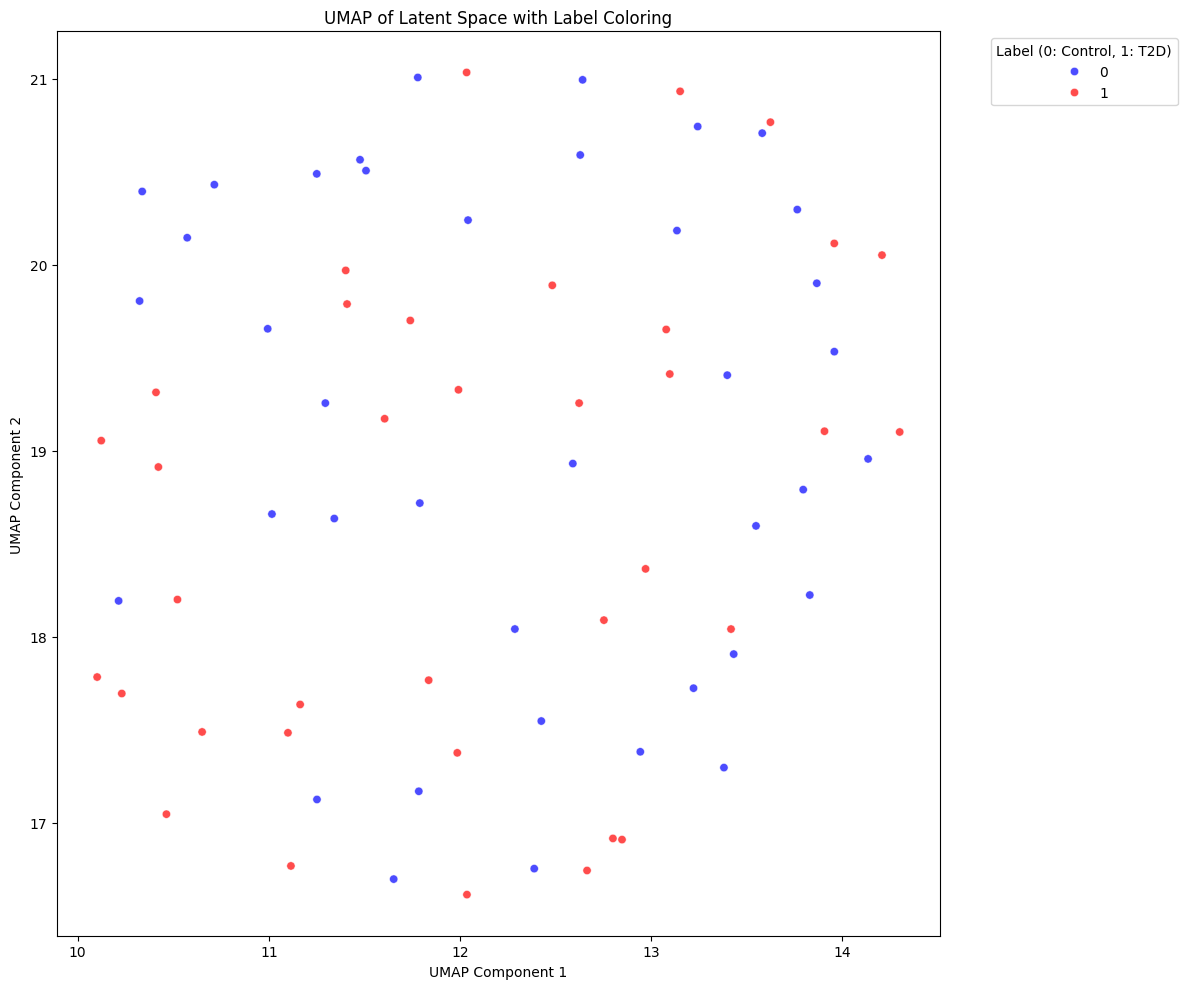

Silhouette Score (Leiden Clustering): 0.10288888216018677
Silhouette Score (Label and Cell Subtype): 0.004094457719475031
Reconstruction MSE: 232.56939697265625
ARI: 0.008895644373567229
NMI: 0.01477940092548031
LR Accuracy: 0.5333333333333333
LR ROC-AUC: 0.4464285714285714
Classification Report LR:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.50      0.43      0.46         7

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.52        15
weighted avg       0.53      0.53      0.53        15

SVM Accuracy: 0.4666666666666667
SVM ROC-AUC: 0.6428571428571428
Classification Report SVM:
               precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.40      0.29      0.33         7

    accuracy                           0.47        15
   macro avg       0.45      0.46      0.44        15
weight

In [ ]:
    from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

    adata = adata.copy()

    print(f"\nTraining VAE for Subtype: {subtype}")

    # Setup and train the VAE
    vae_params = {
        "n_hidden": 150,
        "n_layers": 5,
        "n_latent": 30,       # Increase latent space dimension
        "dropout_rate": 0.2,  # Add dropout for regularization
        "gene_likelihood": "zinb"  # Often used for scRNA-seq data
    }

    scvi.model.SCVI.setup_anndata(adata, labels_key="label")
    scvi.settings.seed = 42

    # Initialize SCVI model with improved parameters
    vae = scvi.model.SCVI(
        adata,
        n_hidden=vae_params["n_hidden"],
        n_latent=vae_params["n_latent"],
        n_layers=vae_params["n_layers"],
        dropout_rate=vae_params["dropout_rate"],
        gene_likelihood=vae_params["gene_likelihood"]
    )

    # Train the model: You can also consider using early stopping
    vae.train(max_epochs=700,  # Increase epochs if needed
              train_size=0.9,
              early_stopping=False,
              early_stopping_patience=100,
              early_stopping_monitor="elbo_validation")

    latent = vae.get_latent_representation()

    # Perform Leiden clustering
    adata.obsm['X_pca'] = latent  # Use the latent space for Leiden clustering
    sc.pp.neighbors(adata, n_neighbors=15, use_rep='X_pca')  # Define the graph
    sc.tl.leiden(adata, resolution=1.0)  # Perform Leiden clustering
    adata.obs['leiden'] = adata.obs['leiden'].astype(str)  # Convert Leiden labels to strings

    # Add Leiden clusters to AnnData
    adata.obs['leiden'] = adata.obs['leiden'].astype(str)
    """
    # Evaluate with UMAP
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
    adata.obs['label_str'] = adata.obs['label'].map({0: 'control', 1: 'T2D'})
    adata.obs['label_cell_subtype'] = adata.obs['label_str'].astype(str) + 'x' + adata.obs['cell_subtype'].astype(str)
    umap_df['group'] = adata.obs['label_cell_subtype'].values

    plt.figure(figsize=(10,8))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='group', data=umap_df, palette='Set1')
    plt.title('UMAP of Improved VAE Latent Space')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.legend(title='Label & Cell Subtype', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    """
    reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = reducer.fit_transform(latent)

    # Create a DataFrame for UMAP results
    umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
    # Add 'label_cell_subtype' and 'leiden' to the DataFrame
    umap_df['group'] = adata.obs['label'].values  # For coloring
    umap_df['leiden'] = adata.obs['leiden']  # For reference, if needed

    # Define a custom palette
    palette = {0: 'blue', 1: 'red'}

    # Plot UMAP with the custom palette
    plt.figure(figsize=(12, 10))
    sns.scatterplot(
        x='UMAP1',
        y='UMAP2',
        hue='group',  # Based on the 'label'
        data=umap_df,
        palette=palette,
        legend='full',
        alpha=0.7
    )

    # Titles and labels
    plt.title('UMAP of Latent Space with Label Coloring')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')

    # Adjust legend position
    plt.legend(
        title='Label (0: Control, 1: T2D)',
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

    plt.tight_layout()
    plt.show()

    # -------------------------------
    # Step 5: Evaluate Clustering
    # -------------------------------

    # Compute silhouette score for Leiden clusters
    silhouette_leiden = silhouette_score(latent, adata.obs['leiden'])
    print(f"Silhouette Score (Leiden Clustering): {silhouette_leiden}")

    # Compute silhouette score for label_cell_subtype
    silhouette_label_cell = silhouette_score(latent, adata.obs['label'])
    print(f"Silhouette Score (Label and Cell Subtype): {silhouette_label_cell}")

    # Reconstruction error (MSE)
    reconstructed_data = vae.get_normalized_expression().to_numpy()
    original_data = adata.X
    mse = mean_squared_error(original_data.flatten(), reconstructed_data.flatten())
    print(f"Reconstruction MSE: {mse}")

    # Clustering metrics (ARI, NMI)
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    kmeans_labels = kmeans.fit_predict(latent)
    ari = adjusted_rand_score(adata.obs['label'], kmeans_labels)
    nmi = normalized_mutual_info_score(adata.obs['label'], kmeans_labels)
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")

    # Classification stage (optional, no oversampling)
    X = latent
    y = adata.obs['label'].astype(int).values
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Try Logistic Regression
    clf_lr = LogisticRegression(max_iter=1000, random_state=42)
    clf_lr.fit(X_train, y_train)
    y_pred_lr = clf_lr.predict(X_test)
    y_pred_proba_lr = clf_lr.predict_proba(X_test)[:, 1]
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
    print(f"LR Accuracy: {accuracy_lr}")
    print(f"LR ROC-AUC: {roc_auc_lr}")
    print("Classification Report LR:\n", classification_report(y_test, y_pred_lr))

    # Try SVM
    svm = SVC(probability=True, random_state=42, kernel='rbf', C=1)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
    accuracy_svm = accuracy_score(y_test, y_pred_svm)
    roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
    print(f"SVM Accuracy: {accuracy_svm}")
    print(f"SVM ROC-AUC: {roc_auc_svm}")
    print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm))